In [112]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from scipy import stats
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from scipy import stats
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [113]:
df=pd.read_csv('fraud_detection_dataset.csv')
pd.set_option('display.max_columns', None)
df

,Transaction_ID,Customer_ID,Transaction_Amount,Transaction_Date,Merchant_ID,Merchant_Category,Card_Type,Is_Online,Is_Fraud,Customer_Age,Customer_Gender,Customer_Income,Transaction_City,Device_Type,Is_International
0,T0001,C001,1878.955193,2022-01-01 00:00:00,M001,Entertainment,Credit,0.0,0.0,59.0,Male,NaN,NaN,Mobile,0.0
1,T0002,C002,4754.064389,2022-01-02 00:00:00,NaN,Clothing,Debit,0.0,0.0,66.0,Male,106204.26510,Houston,NaN,1.0
2,T0003,C003,3662.649770,2022-01-03 00:00:00,M003,Electronics,Prepaid,0.0,0.0,NaN,Female,104454.93990,Chicago,Tablet,0.0
3,T0004,C004,2997.305836,2022-01-04 00:00:00,M004,Entertainment,Credit,0.0,0.0,48.0,Male,51910.04732,New York,Tablet,0.0
4,T0005,NaN,788.533016,2022-01-05 00:00:00,M005,NaN,Credit,0.0,0.0,NaN,Female,102891.54740,Phoenix,Tablet,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,T0196,C046,1752.555777,2022-07-15 00:00:00,NaN,Clothing,Debit,1.0,NaN,63.0,Female,115086.35620,Los Angeles,Mobile,0.0
196,T0197,NaN,NaN,2022-07-16 00:00:00,M017,NaN,Credit,0.0,0.0,40.0,NaN,35105.78918,Chicago,Tablet,NaN
197,T0198,C048,NaN,2022-07-17 00:00:00,M018,Entertainment,NaN,0.0,1.0,49.0,Male,63233.48010,Phoenix,Tablet,0.0
198,T0199,NaN,4436.561257,2022-07-18 00:00:00,M019,Clothing,Prepaid,0.0,0.0,34.0,Male,114361.59200,Phoenix,Tablet,0.0


### Column Description: 

Transaction ID: Unique Ids given to each transaction.

Customer_ID: Unique IDs given to each customer.

Transaction_Amount: Amount of each carried out transaction.

Transaction_Date: Date when each transaction was done.

Merchant_ID: Unique ID given at each transaction that has been carried out.

Merchant_Category: Business category for each merchant.

Card_Type: Credit card type.

Is_Online: Was the transaction done online.

Is_Fraud: Has the transaction been indicated as fraud.

Customer_Age: Age at which each client made the transaction.

Customer_Gender: Gender of each customer.

Customer_Income: Customer income at the time of transaction.

Transaction_City: Location where transaction was made.

Device_Type: Device where transaction was carried.

Is_International: Was transaction performed internationally.










In [114]:
print('Shape of DataFrame (Observations and Rows) = ', df.shape)

Shape of DataFrame (Observations and Rows) =  (200, 15)


The following function will show me the top 5 rows in the dataset

In [115]:
df.head()

,Transaction_ID,Customer_ID,Transaction_Amount,Transaction_Date,Merchant_ID,Merchant_Category,Card_Type,Is_Online,Is_Fraud,Customer_Age,Customer_Gender,Customer_Income,Transaction_City,Device_Type,Is_International
0,T0001,C001,1878.955193,2022-01-01 00:00:00,M001,Entertainment,Credit,0.0,0.0,59.0,Male,NaN,NaN,Mobile,0.0
1,T0002,C002,4754.064389,2022-01-02 00:00:00,NaN,Clothing,Debit,0.0,0.0,66.0,Male,106204.26510,Houston,NaN,1.0
2,T0003,C003,3662.649770,2022-01-03 00:00:00,M003,Electronics,Prepaid,0.0,0.0,NaN,Female,104454.93990,Chicago,Tablet,0.0
3,T0004,C004,2997.305836,2022-01-04 00:00:00,M004,Entertainment,Credit,0.0,0.0,48.0,Male,51910.04732,New York,Tablet,0.0
4,T0005,NaN,788.533016,2022-01-05 00:00:00,M005,NaN,Credit,0.0,0.0,NaN,Female,102891.54740,Phoenix,Tablet,0.0


The following function will show me the last 5 rows in the dataset

In [116]:
df.tail()

,Transaction_ID,Customer_ID,Transaction_Amount,Transaction_Date,Merchant_ID,Merchant_Category,Card_Type,Is_Online,Is_Fraud,Customer_Age,Customer_Gender,Customer_Income,Transaction_City,Device_Type,Is_International
195,T0196,C046,1752.555777,2022-07-15 00:00:00,NaN,Clothing,Debit,1.0,NaN,63.0,Female,115086.35620,Los Angeles,Mobile,0.0
196,T0197,NaN,NaN,2022-07-16 00:00:00,M017,NaN,Credit,0.0,0.0,40.0,NaN,35105.78918,Chicago,Tablet,NaN
197,T0198,C048,NaN,2022-07-17 00:00:00,M018,Entertainment,NaN,0.0,1.0,49.0,Male,63233.48010,Phoenix,Tablet,0.0
198,T0199,NaN,4436.561257,2022-07-18 00:00:00,M019,Clothing,Prepaid,0.0,0.0,34.0,Male,114361.59200,Phoenix,Tablet,0.0
199,T0200,C050,NaN,2022-07-19 00:00:00,M020,Electronics,NaN,0.0,0.0,67.0,Male,61972.73169,New York,Tablet,0.0


In [117]:
df.shape

(200, 15)

I will now transform the column Transaction_Date into datetime

In [118]:
from datetime import datetime

In [119]:
df['Transaction_Date']=pd.to_datetime(df['Transaction_Date'])

In [120]:
df = df.set_index('Transaction_Date')

In [121]:
df

,Transaction_ID,Customer_ID,Transaction_Amount,Merchant_ID,Merchant_Category,Card_Type,Is_Online,Is_Fraud,Customer_Age,Customer_Gender,Customer_Income,Transaction_City,Device_Type,Is_International
Transaction_Date,,,,,,,,,,,,,,
2022-01-01,T0001,C001,1878.955193,M001,Entertainment,Credit,0.0,0.0,59.0,Male,NaN,NaN,Mobile,0.0
2022-01-02,T0002,C002,4754.064389,NaN,Clothing,Debit,0.0,0.0,66.0,Male,106204.26510,Houston,NaN,1.0
2022-01-03,T0003,C003,3662.649770,M003,Electronics,Prepaid,0.0,0.0,NaN,Female,104454.93990,Chicago,Tablet,0.0
2022-01-04,T0004,C004,2997.305836,M004,Entertainment,Credit,0.0,0.0,48.0,Male,51910.04732,New York,Tablet,0.0
2022-01-05,T0005,NaN,788.533016,M005,NaN,Credit,0.0,0.0,NaN,Female,102891.54740,Phoenix,Tablet,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-15,T0196,C046,1752.555777,NaN,Clothing,Debit,1.0,NaN,63.0,Female,115086.35620,Los Angeles,Mobile,0.0
2022-07-16,T0197,NaN,NaN,M017,NaN,Credit,0.0,0.0,40.0,NaN,35105.78918,Chicago,Tablet,NaN
2022-07-17,T0198,C048,NaN,M018,Entertainment,NaN,0.0,1.0,49.0,Male,63233.48010,Phoenix,Tablet,0.0


I want to visualize the first and last day of transactions to better understand my dataset.

To do so I will create a line plot connecting the first and last day of transactions. 

First Transaction Date: 2022-01-01 00:00:00
Last Transaction Date: 2022-07-19 00:00:00


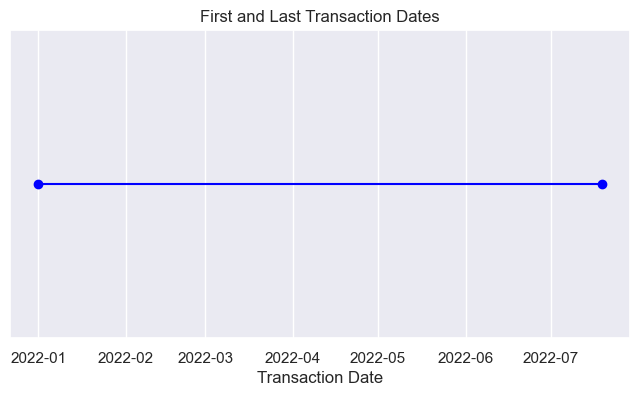

In [122]:
first_day = df.index.min()
last_day = df.index.max()
print(f"First Transaction Date: {first_day}")
print(f"Last Transaction Date: {last_day}")
plt.figure(figsize=(8, 4))
plt.plot([first_day, last_day], [0, 0], marker='o', linestyle='-', color='blue')
plt.yticks([])  
plt.xlabel('Transaction Date')
plt.title('First and Last Transaction Dates')
plt.grid(True)
plt.show()

Now I can see that the first transaction was on 01/01/20222 and the last day was on 19/07/2022

## Dataframe Atributes

### Characterisation of the data set:

### Lets now visualize the data types of each column and any missing values

I will now inspect the data types of the columns

In [123]:
print(df.dtypes)

Transaction_ID         object
Customer_ID            object
Transaction_Amount    float64
Merchant_ID            object
Merchant_Category      object
Card_Type              object
Is_Online             float64
Is_Fraud              float64
Customer_Age          float64
Customer_Gender        object
Customer_Income       float64
Transaction_City       object
Device_Type            object
Is_International      float64
dtype: object


In [124]:
df.dtypes.value_counts()

object     8
float64    6
dtype: int64

Checking the shape of the dataframe

The following function, will display the number of rows (200) and the number of columns (14)

In [125]:
print('Shape of DataFrame (Observations and Rows) = ', df.shape)

Shape of DataFrame (Observations and Rows) =  (200, 14)


Now I will see the column names

In [126]:
df.columns

Index(['Transaction_ID', 'Customer_ID', 'Transaction_Amount', 'Merchant_ID',
       'Merchant_Category', 'Card_Type', 'Is_Online', 'Is_Fraud',
       'Customer_Age', 'Customer_Gender', 'Customer_Income',
       'Transaction_City', 'Device_Type', 'Is_International'],
      dtype='object')

In [127]:
values = df.values
values

array([['T0001', 'C001', 1878.955193, ..., nan, 'Mobile', 0.0],
       ['T0002', 'C002', 4754.064389, ..., 'Houston', nan, 1.0],
       ['T0003', 'C003', 3662.64977, ..., 'Chicago', 'Tablet', 0.0],
       ...,
       ['T0198', 'C048', nan, ..., 'Phoenix', 'Tablet', 0.0],
       ['T0199', nan, 4436.561257, ..., 'Phoenix', 'Tablet', 0.0],
       ['T0200', 'C050', nan, ..., 'New York', 'Tablet', 0.0]],
      dtype=object)

### Number of distinct values in each feature

Lets now visualize the number of distinct values in each feature

In [128]:
for col in df.columns:
    print(col, ': Number of Distinct Values: ', len(df[col].unique()))

Transaction_ID : Number of Distinct Values:  200
Customer_ID : Number of Distinct Values:  51
Transaction_Amount : Number of Distinct Values:  163
Merchant_ID : Number of Distinct Values:  31
Merchant_Category : Number of Distinct Values:  6
Card_Type : Number of Distinct Values:  4
Is_Online : Number of Distinct Values:  3
Is_Fraud : Number of Distinct Values:  3
Customer_Age : Number of Distinct Values:  51
Customer_Gender : Number of Distinct Values:  3
Customer_Income : Number of Distinct Values:  181
Transaction_City : Number of Distinct Values:  6
Device_Type : Number of Distinct Values:  4
Is_International : Number of Distinct Values:  3


Print the distinct values in each feature

In [129]:
for col in df:
    print('COLUMN NAME: ', col,':')
    print(df[col].unique())
    print('\n')

COLUMN NAME:  Transaction_ID :
['T0001' 'T0002' 'T0003' 'T0004' 'T0005' 'T0006' 'T0007' 'T0008' 'T0009'
 'T0010' 'T0011' 'T0012' 'T0013' 'T0014' 'T0015' 'T0016' 'T0017' 'T0018'
 'T0019' 'T0020' 'T0021' 'T0022' 'T0023' 'T0024' 'T0025' 'T0026' 'T0027'
 'T0028' 'T0029' 'T0030' 'T0031' 'T0032' 'T0033' 'T0034' 'T0035' 'T0036'
 'T0037' 'T0038' 'T0039' 'T0040' 'T0041' 'T0042' 'T0043' 'T0044' 'T0045'
 'T0046' 'T0047' 'T0048' 'T0049' 'T0050' 'T0051' 'T0052' 'T0053' 'T0054'
 'T0055' 'T0056' 'T0057' 'T0058' 'T0059' 'T0060' 'T0061' 'T0062' 'T0063'
 'T0064' 'T0065' 'T0066' 'T0067' 'T0068' 'T0069' 'T0070' 'T0071' 'T0072'
 'T0073' 'T0074' 'T0075' 'T0076' 'T0077' 'T0078' 'T0079' 'T0080' 'T0081'
 'T0082' 'T0083' 'T0084' 'T0085' 'T0086' 'T0087' 'T0088' 'T0089' 'T0090'
 'T0091' 'T0092' 'T0093' 'T0094' 'T0095' 'T0096' 'T0097' 'T0098' 'T0099'
 'T0100' 'T0101' 'T0102' 'T0103' 'T0104' 'T0105' 'T0106' 'T0107' 'T0108'
 'T0109' 'T0110' 'T0111' 'T0112' 'T0113' 'T0114' 'T0115' 'T0116' 'T0117'
 'T0118' 'T0119' 'T0

I will now look for duplicate rows

In [130]:
df.count()

Transaction_ID        200
Customer_ID           163
Transaction_Amount    162
Merchant_ID           160
Merchant_Category     162
Card_Type             162
Is_Online             180
Is_Fraud              180
Customer_Age          180
Customer_Gender       180
Customer_Income       180
Transaction_City      180
Device_Type           180
Is_International      180
dtype: int64

In [131]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 14)


In [132]:
df.duplicated().sum()

0

There is no duplicate data

The following function will give me a summary of statistics pertaining to the float columns and calculate the 5 number summary giving me the Mean, Standard Deviation, 1st Quartile: 25%, 3rd Quartile: 75%, Minimum: Smallest Observation in the Sample and Maximum: Largest Observation in the sample.

I will now call the .describe() function to quickly analyse the summary statistics for the numerical features.

In [133]:
df.describe()

,Transaction_Amount,Is_Online,Is_Fraud,Customer_Age,Customer_Income,Is_International
count,162.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,2483.627917,0.461111,0.083333,44.877778,72922.291160,0.111111
std,1460.796088,0.499876,0.277156,15.260002,30005.132560,0.315146
min,92.773266,0.000000,0.000000,18.000000,20638.587170,0.000000
25%,1226.883909,0.000000,0.000000,35.000000,45979.113178,0.000000
50%,2504.819185,0.000000,0.000000,45.000000,77290.908590,0.000000
75%,3844.424019,1.000000,0.000000,57.250000,99546.366692,0.000000
max,4934.565814,1.000000,1.000000,69.000000,119793.411100,1.000000


In [134]:
df.describe(include=object)

,Transaction_ID,Customer_ID,Merchant_ID,Merchant_Category,Card_Type,Customer_Gender,Transaction_City,Device_Type
count,200,163,160,162,162,180,180,180
unique,200,50,30,5,3,2,5,3
top,T0001,C001,M005,Entertainment,Credit,Male,Houston,Mobile
freq,1,4,7,34,69,100,41,66


In [135]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Transaction_Amount,162.0,2483.627917,1460.796088,92.773266,1226.883909,2504.819185,3844.424019,4934.565814
Is_Online,180.0,0.461111,0.499876,0.000000,0.000000,0.000000,1.000000,1.000000
Is_Fraud,180.0,0.083333,0.277156,0.000000,0.000000,0.000000,0.000000,1.000000
Customer_Age,180.0,44.877778,15.260002,18.000000,35.000000,45.000000,57.250000,69.000000
Customer_Income,180.0,72922.291160,30005.132560,20638.587170,45979.113178,77290.908590,99546.366692,119793.411100
Is_International,180.0,0.111111,0.315146,0.000000,0.000000,0.000000,0.000000,1.000000


In [136]:
print('length of data is', len(df))

length of data is 200


In [137]:
numerical_summary = df.describe().transpose()

palette = sns.color_palette("viridis", as_cmap=True)

numerical_summary.style.background_gradient(cmap=palette)

,count,mean,std,min,25%,50%,75%,max
Transaction_Amount,162.000000,2483.627917,1460.796088,92.773266,1226.883909,2504.819185,3844.424019,4934.565814
Is_Online,180.000000,0.461111,0.499876,0.000000,0.000000,0.000000,1.000000,1.000000
Is_Fraud,180.000000,0.083333,0.277156,0.000000,0.000000,0.000000,0.000000,1.000000
Customer_Age,180.000000,44.877778,15.260002,18.000000,35.000000,45.000000,57.250000,69.000000
Customer_Income,180.000000,72922.291160,30005.132560,20638.587170,45979.113178,77290.908590,99546.366692,119793.411100
Is_International,180.000000,0.111111,0.315146,0.000000,0.000000,0.000000,0.000000,1.000000


### Categorical and numerical data analysis

I will visualize how many Qualitative features are there in the dataset

In [138]:
qualitative=[feature for feature in df.columns if len(df[feature].unique())<=10]
qualitative

['Merchant_Category',
 'Card_Type',
 'Is_Online',
 'Is_Fraud',
 'Customer_Gender',
 'Transaction_City',
 'Device_Type',
 'Is_International']

In [139]:
for feature in qualitative:
    print(feature)
    print(df[feature].unique())

Merchant_Category
['Entertainment' 'Clothing' 'Electronics' nan 'Groceries' 'Travel']
Card_Type
['Credit' 'Debit' 'Prepaid' nan]
Is_Online
[ 0.  1. nan]
Is_Fraud
[ 0. nan  1.]
Customer_Gender
['Male' 'Female' nan]
Transaction_City
[nan 'Houston' 'Chicago' 'New York' 'Phoenix' 'Los Angeles']
Device_Type
['Mobile' nan 'Tablet' 'Desktop']
Is_International
[ 0.  1. nan]


Lets now visualize the relationship between the qualitative features and Is_Fraud using a bar char

Merchant_Category


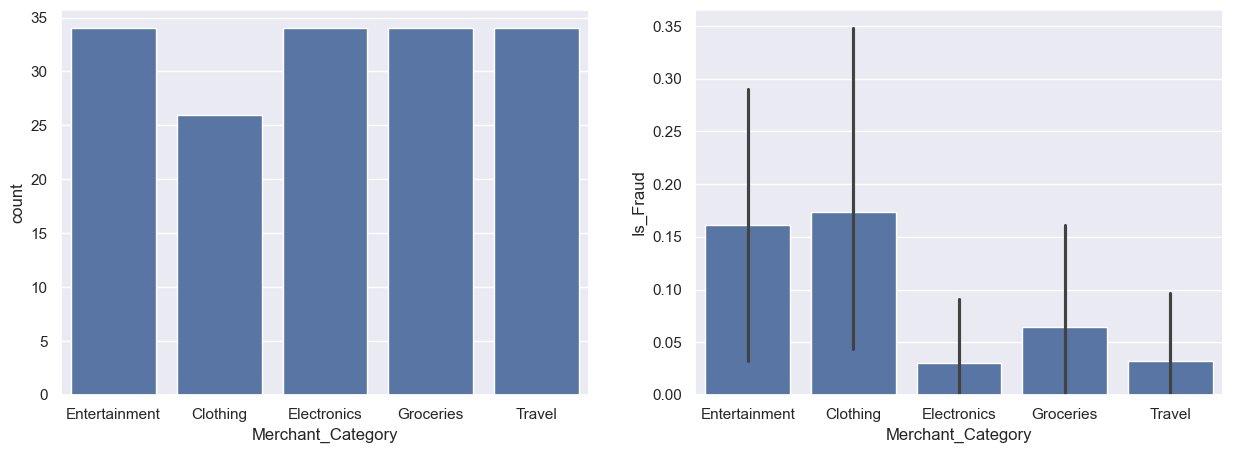

Card_Type


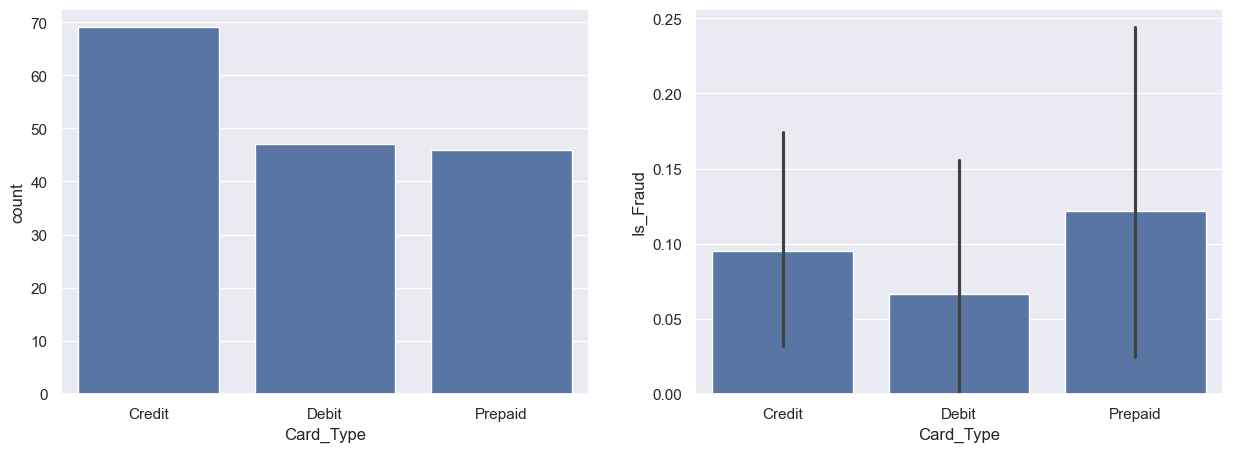

Is_Online


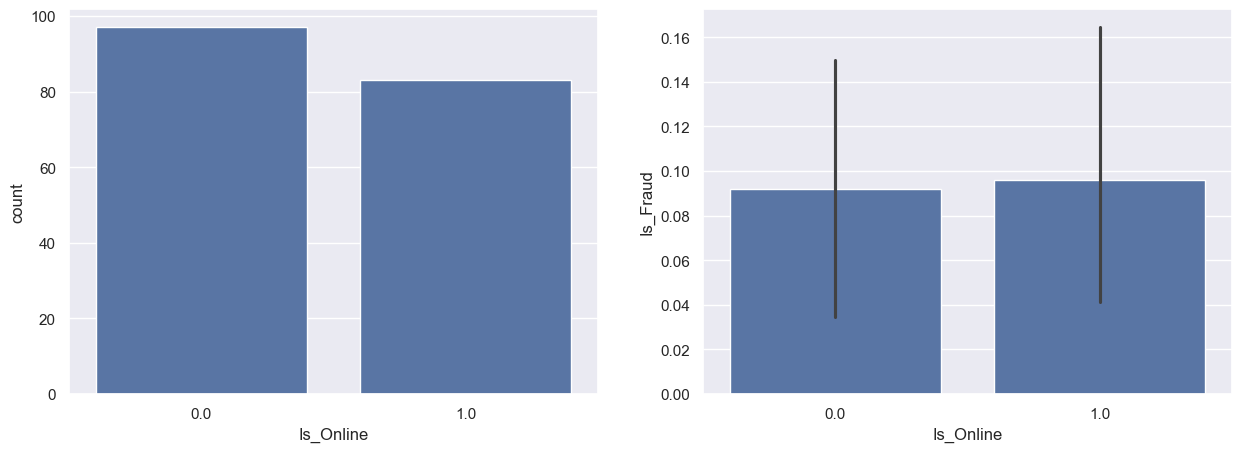

Is_Fraud


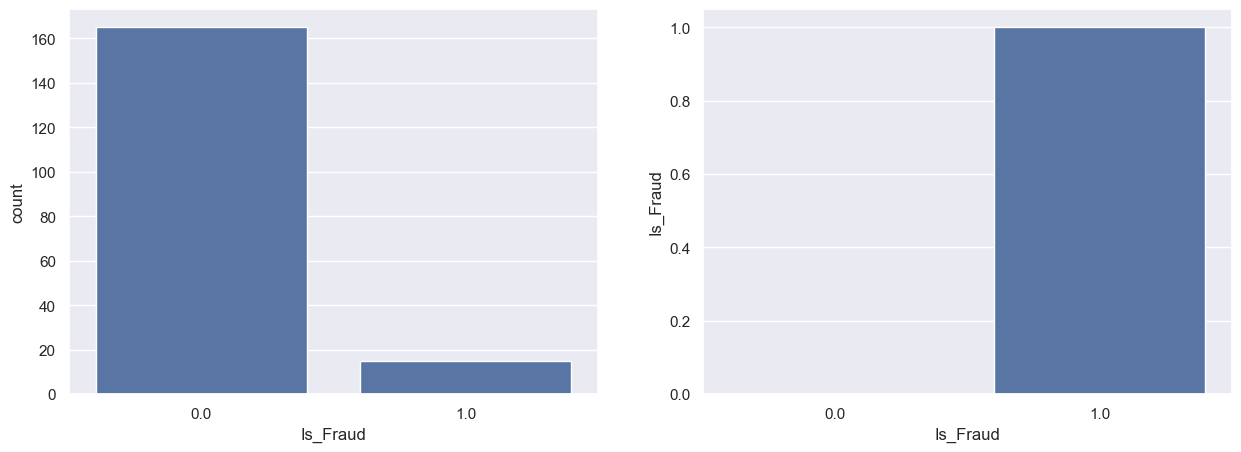

Customer_Gender


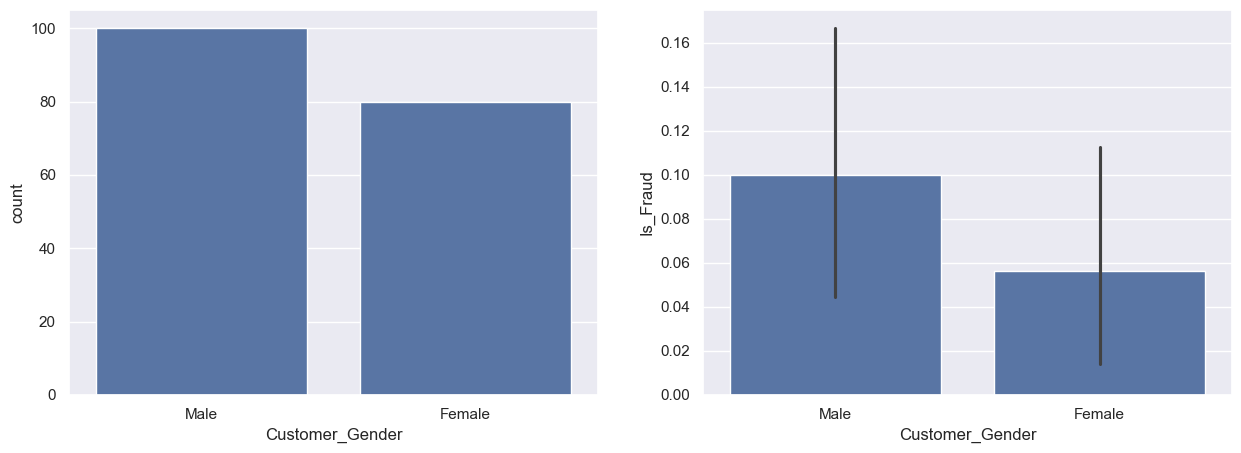

Transaction_City


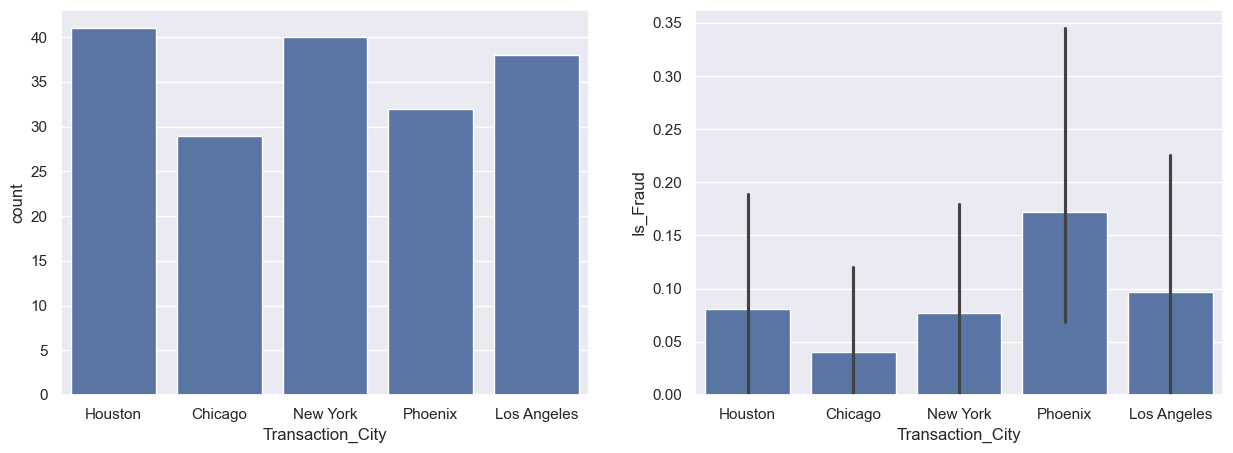

Device_Type


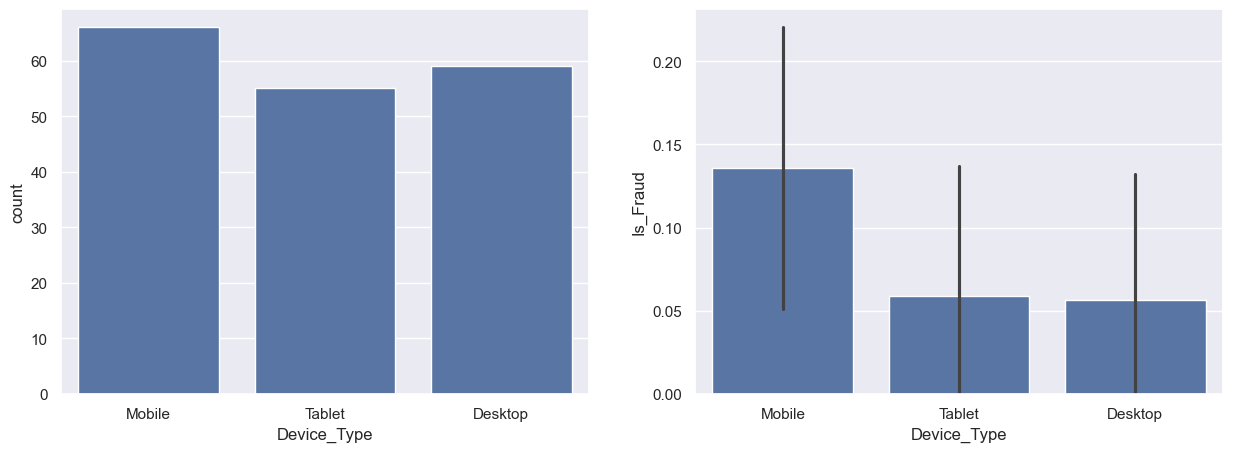

Is_International


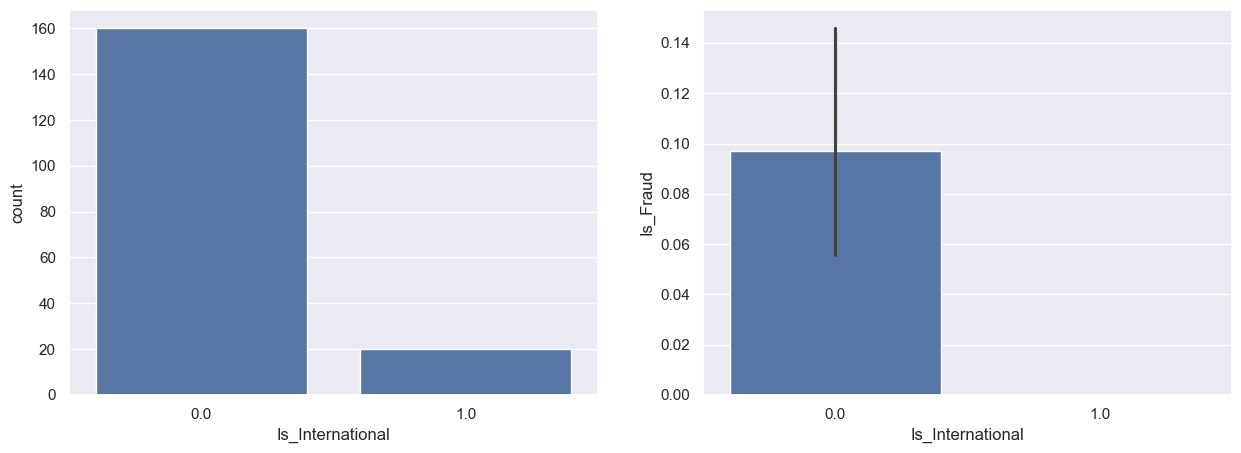

In [140]:
for feature in qualitative:
    print(feature)
    plt.figure(figsize=(15,5))
    plt.subplot(1, 2, 1)
    sns.countplot(x=feature,data=df)
    plt.subplot(1, 2, 2)
    sns.barplot(x=feature,y='Is_Fraud',data=df)
    plt.show()

The following code tells me the amount of quantitative variables in the dataframe.

In [141]:
quantitative=[feature for feature in df.columns if df[feature].dtype!='O' and
             len(df[feature].unique())>10]
quantitative

['Transaction_Amount', 'Customer_Age', 'Customer_Income']

I will now use Histogram to visualize the distribution of quantitative features by using the function count in the quantitative columns

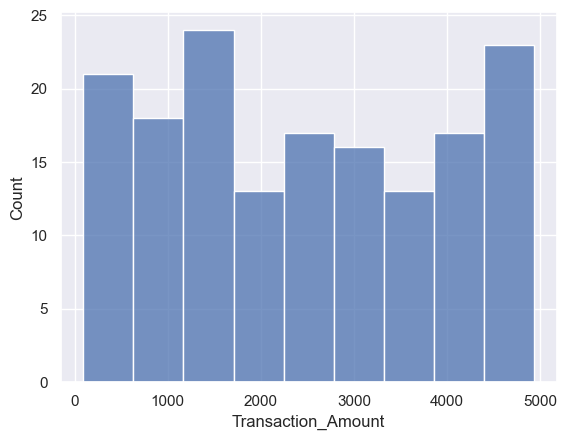

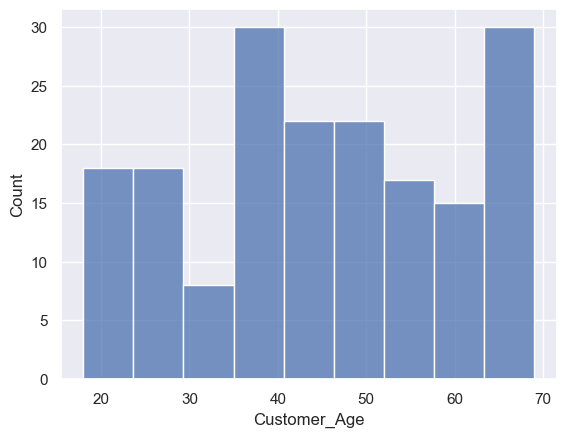

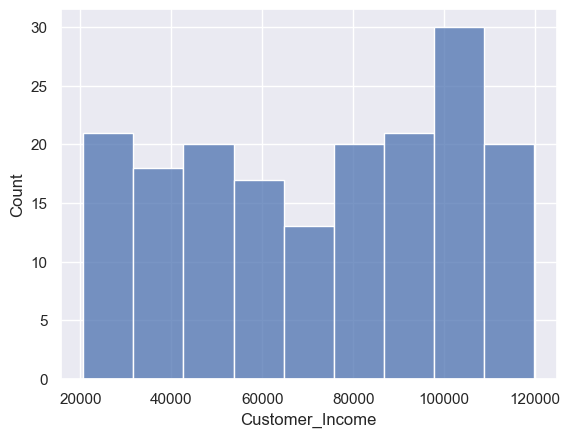

In [142]:
for feature in quantitative:
    sns.histplot(df[feature])
    plt.show()

I will now analyse the Descriptive Statistics for Numerical columns

In [143]:
numerical_cols = ['Transaction_Amount', 'Customer_Age', 'Customer_Income']
print("Descriptive Statistics for Numerical Columns:")
print(df[numerical_cols].describe())

Descriptive Statistics for Numerical Columns:
       Transaction_Amount  Customer_Age  Customer_Income
count          162.000000    180.000000       180.000000
mean          2483.627917     44.877778     72922.291160
std           1460.796088     15.260002     30005.132560
min             92.773266     18.000000     20638.587170
25%           1226.883909     35.000000     45979.113178
50%           2504.819185     45.000000     77290.908590
75%           3844.424019     57.250000     99546.366692
max           4934.565814     69.000000    119793.411100


In [144]:
numerical_cols

['Transaction_Amount', 'Customer_Age', 'Customer_Income']

The column Transaction amount, seems very interesting, so I will further investigate it.

In [145]:
df.Transaction_Amount.value_counts

<bound method IndexOpsMixin.value_counts of Transaction_Date
2022-01-01    1878.955193
2022-01-02    4754.064389
2022-01-03    3662.649770
2022-01-04    2997.305836
2022-01-05     788.533016
                 ...     
2022-07-15    1752.555777
2022-07-16            NaN
2022-07-17            NaN
2022-07-18    4436.561257
2022-07-19            NaN
Name: Transaction_Amount, Length: 200, dtype: float64>

The following function will calculate the median of Transaction_Amount column

In [146]:
average = df["Transaction_Amount"].median()
print(average)

2504.819185


The following function will calculate the mode of Transaction_Amount column

In [147]:
mode = df["Transaction_Amount"].mode()
print(mode)

0        92.773266
1       136.841442
2       166.831637
3       194.065867
4       213.467956
          ...     
157    4828.503845
158    4848.227293
159    4849.850162
160    4928.395766
161    4934.565814
Name: Transaction_Amount, Length: 162, dtype: float64


The following function will calculate the mean of Transaction_Amount column

In [148]:
middlePoint = df["Transaction_Amount"].mean()
print(middlePoint)

2483.627917144753


In [149]:
dispersion = df["Transaction_Amount"].std()
print(dispersion)

1460.7960879365871


I will define categorical cols as Categorical Columns and will continue to visualize its values

In [150]:
categorical_cols = ['Merchant_Category',
 'Card_Type',
 'Is_Online',
 'Is_Fraud',
 'Customer_Gender',
 'Transaction_City',
 'Device_Type',
 'Is_International']
print("\nValues for Categorical Columns:")
for col in categorical_cols:
    print(f"\n{col}:")
    print(df[col].value_counts())
    print(f"Number of Unique Values: {df[col].nunique()}")
    print(f"Mode: {df[col].mode().tolist()}")


Values for Categorical Columns:

Merchant_Category:
Entertainment    34
Electronics      34
Groceries        34
Travel           34
Clothing         26
Name: Merchant_Category, dtype: int64
Number of Unique Values: 5
Mode: ['Electronics', 'Entertainment', 'Groceries', 'Travel']

Card_Type:
Credit     69
Debit      47
Prepaid    46
Name: Card_Type, dtype: int64
Number of Unique Values: 3
Mode: ['Credit']

Is_Online:
0.0    97
1.0    83
Name: Is_Online, dtype: int64
Number of Unique Values: 2
Mode: [0.0]

Is_Fraud:
0.0    165
1.0     15
Name: Is_Fraud, dtype: int64
Number of Unique Values: 2
Mode: [0.0]

Customer_Gender:
Male      100
Female     80
Name: Customer_Gender, dtype: int64
Number of Unique Values: 2
Mode: ['Male']

Transaction_City:
Houston        41
New York       40
Los Angeles    38
Phoenix        32
Chicago        29
Name: Transaction_City, dtype: int64
Number of Unique Values: 5
Mode: ['Houston']

Device_Type:
Mobile     66
Desktop    59
Tablet     55
Name: Device_Type, 

In [151]:
categorical_cols

['Merchant_Category',
 'Card_Type',
 'Is_Online',
 'Is_Fraud',
 'Customer_Gender',
 'Transaction_City',
 'Device_Type',
 'Is_International']

#### Check the different values in each feature.

To better understand each feature, I will now use df[col].unique in order to visualize every unique value in each column

In [152]:
for col in df:
    print('COLUMN NAME: ', col,':')
    print(df[col].unique())
    print('\n')

COLUMN NAME:  Transaction_ID :
['T0001' 'T0002' 'T0003' 'T0004' 'T0005' 'T0006' 'T0007' 'T0008' 'T0009'
 'T0010' 'T0011' 'T0012' 'T0013' 'T0014' 'T0015' 'T0016' 'T0017' 'T0018'
 'T0019' 'T0020' 'T0021' 'T0022' 'T0023' 'T0024' 'T0025' 'T0026' 'T0027'
 'T0028' 'T0029' 'T0030' 'T0031' 'T0032' 'T0033' 'T0034' 'T0035' 'T0036'
 'T0037' 'T0038' 'T0039' 'T0040' 'T0041' 'T0042' 'T0043' 'T0044' 'T0045'
 'T0046' 'T0047' 'T0048' 'T0049' 'T0050' 'T0051' 'T0052' 'T0053' 'T0054'
 'T0055' 'T0056' 'T0057' 'T0058' 'T0059' 'T0060' 'T0061' 'T0062' 'T0063'
 'T0064' 'T0065' 'T0066' 'T0067' 'T0068' 'T0069' 'T0070' 'T0071' 'T0072'
 'T0073' 'T0074' 'T0075' 'T0076' 'T0077' 'T0078' 'T0079' 'T0080' 'T0081'
 'T0082' 'T0083' 'T0084' 'T0085' 'T0086' 'T0087' 'T0088' 'T0089' 'T0090'
 'T0091' 'T0092' 'T0093' 'T0094' 'T0095' 'T0096' 'T0097' 'T0098' 'T0099'
 'T0100' 'T0101' 'T0102' 'T0103' 'T0104' 'T0105' 'T0106' 'T0107' 'T0108'
 'T0109' 'T0110' 'T0111' 'T0112' 'T0113' 'T0114' 'T0115' 'T0116' 'T0117'
 'T0118' 'T0119' 'T0

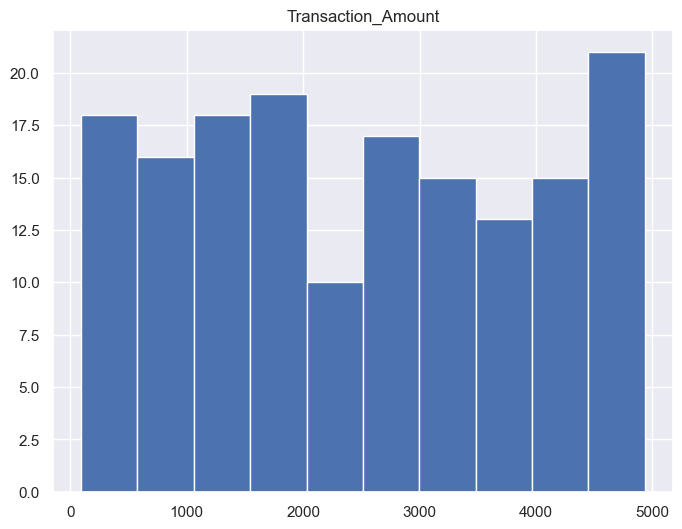

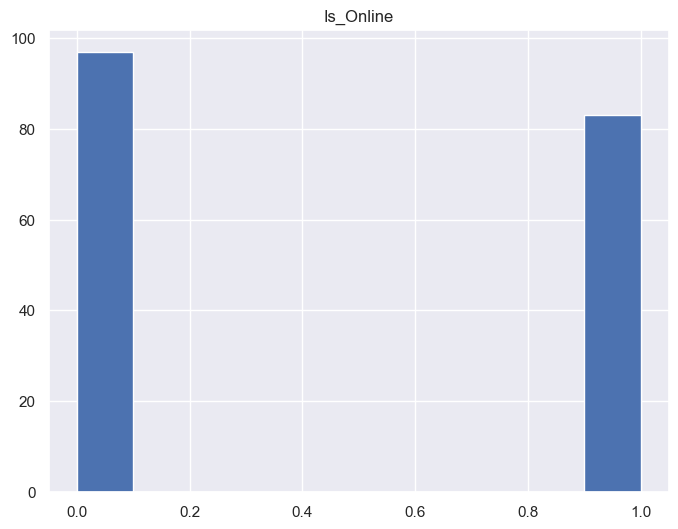

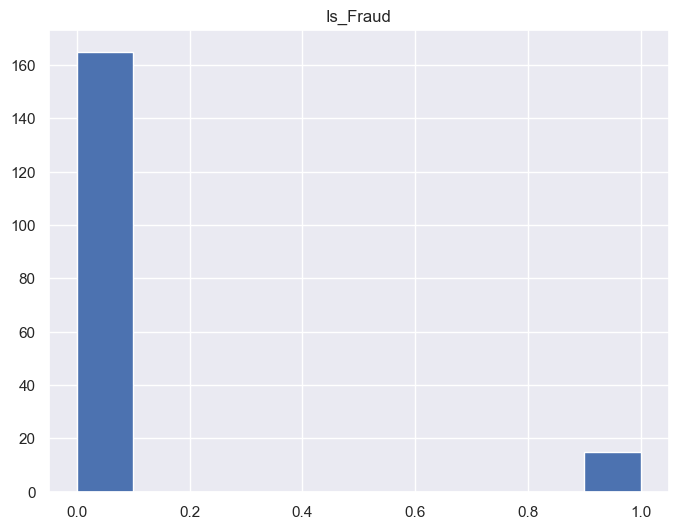

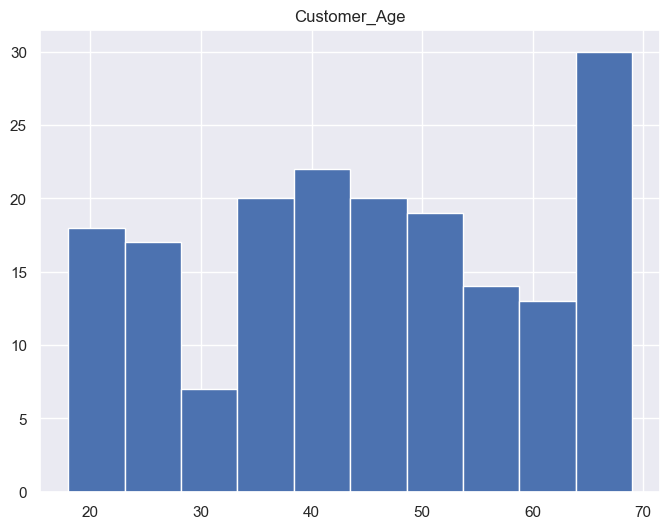

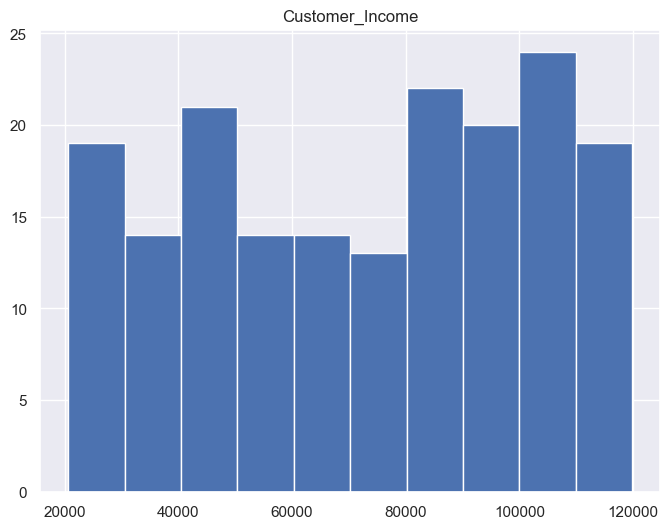

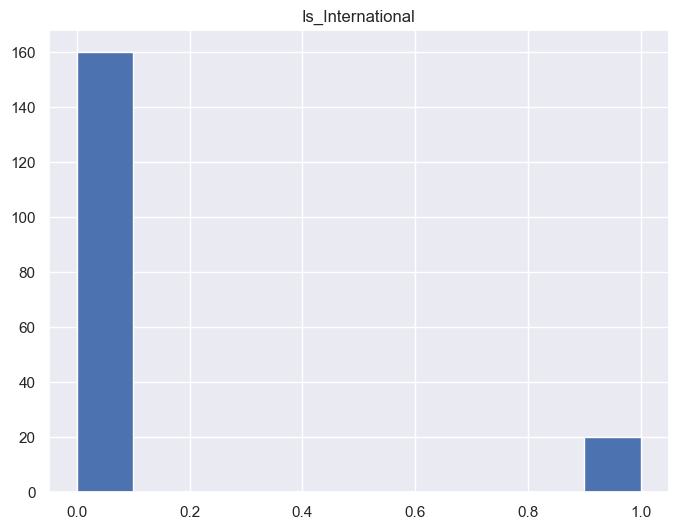

In [153]:
for col in df.select_dtypes(include=['int64', 'float64']).columns:
    plt.figure(figsize=(8, 6))
    plt.hist(df[col], bins=10)
    plt.title(col)
    plt.show()

### Data Cleaning

I will now clean the new dataset to improve data consistency by standardizing and harmonizing the data making it consistent and comparable. Overall I want my data to be reliable and consistent which in turn will lead to a more robust and trustworthy insights and conclusions. I will follow this steps:

Locate any missing values

check for duplicated items

Number of missing data points per column

NaN values will be marked as True

In [154]:
df.isnull()

,Transaction_ID,Customer_ID,Transaction_Amount,Merchant_ID,Merchant_Category,Card_Type,Is_Online,Is_Fraud,Customer_Age,Customer_Gender,Customer_Income,Transaction_City,Device_Type,Is_International
Transaction_Date,,,,,,,,,,,,,,
2022-01-01,False,False,False,False,False,False,False,False,False,False,True,True,False,False
2022-01-02,False,False,False,True,False,False,False,False,False,False,False,False,True,False
2022-01-03,False,False,False,False,False,False,False,False,True,False,False,False,False,False
2022-01-04,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2022-01-05,False,True,False,False,True,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-15,False,False,False,True,False,False,False,True,False,False,False,False,False,False
2022-07-16,False,True,True,False,True,False,False,False,False,True,False,False,False,True
2022-07-17,False,False,True,False,False,True,False,False,False,False,False,False,False,False


How many missing values are there in the dataset?

In [155]:
missing_values_count = df.isnull().sum()
missing_values_count[:]

Transaction_ID         0
Customer_ID           37
Transaction_Amount    38
Merchant_ID           40
Merchant_Category     38
Card_Type             38
Is_Online             20
Is_Fraud              20
Customer_Age          20
Customer_Gender       20
Customer_Income       20
Transaction_City      20
Device_Type           20
Is_International      20
dtype: int64

In [156]:
df.isnull().mean()*100

Transaction_ID         0.0
Customer_ID           18.5
Transaction_Amount    19.0
Merchant_ID           20.0
Merchant_Category     19.0
Card_Type             19.0
Is_Online             10.0
Is_Fraud              10.0
Customer_Age          10.0
Customer_Gender       10.0
Customer_Income       10.0
Transaction_City      10.0
Device_Type           10.0
Is_International      10.0
dtype: float64

In [157]:
total_cells = np.product(df.shape)
total_missing = missing_values_count.sum()

In [158]:
total_missing

351

We have 351 missing values.

I will vizualize the percentage in each column

In [159]:
percentage_missing = (round(df.isnull().  sum() * 100/ len(df),2).sort_values(ascending=False))
display(pd.DataFrame({'Missing Percentage' :percentage_missing}));

,Missing Percentage
Merchant_ID,20.0
Transaction_Amount,19.0
Merchant_Category,19.0
Card_Type,19.0
Customer_ID,18.5
Is_Online,10.0
Is_Fraud,10.0
Customer_Age,10.0
Customer_Gender,10.0
Customer_Income,10.0


We can see the missing values percentage by column in a descending manner:

Merchant_ID	20%

Transaction_Amount	19%

Merchant_Category	19%

Card_Type	19%

Customer_ID	18.5%

Is_Online	10%

Is_Fraud	10%

Customer_Age	10%

Customer_Gender	10%

Customer_Income	10%

Transaction_City	10%

Device_Type	10%

Is_International	10%

Transaction_ID	0.0

Transaction_Date	0.0


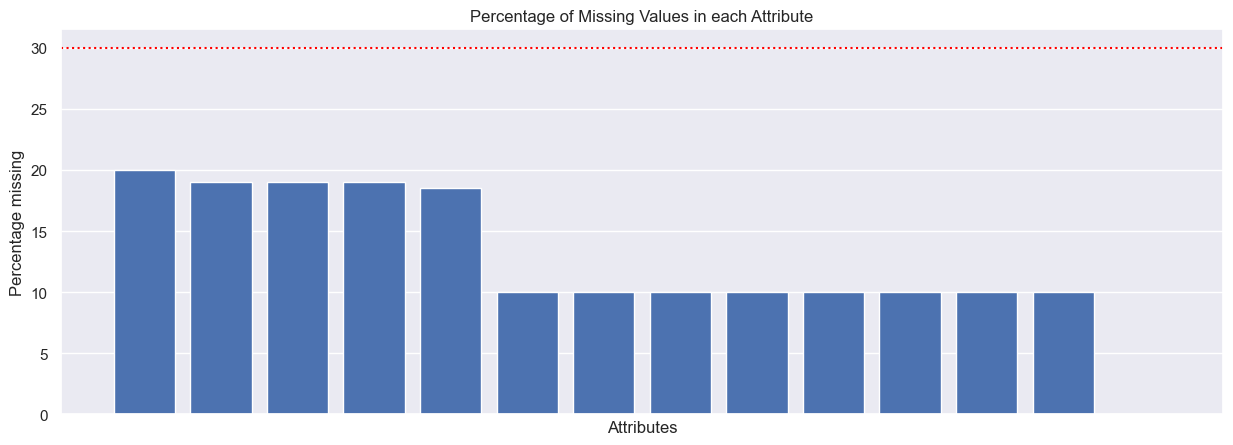

In [160]:
fig, ax = plt.subplots(figsize=(15,5))
threshold = 30

missing = df.isna().sum().div(df.shape[0]).mul(100).to_frame().sort_values(by=0,ascending = False )

ax.bar(missing.index, missing.values.T[0])
plt.title("Percentage of Missing Values in each Attribute")
plt.xticks([])
plt.xlabel("Attributes")
plt.ylabel("Percentage missing")
plt.axhline(threshold, color='red', ls='dotted')
plt.show()

Lets now visualize the percentage of data missing for each feature

In [161]:
def missing_data(df):
    total = df.isnull().sum().sort_values(ascending = False)
    percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data(df)

,Total,Percent
Merchant_ID,40,20.0
Transaction_Amount,38,19.0
Merchant_Category,38,19.0
Card_Type,38,19.0
Customer_ID,37,18.5
Is_Online,20,10.0
Is_Fraud,20,10.0
Customer_Age,20,10.0
Customer_Gender,20,10.0
Customer_Income,20,10.0


### Replacing missing values

I will now replace missing values in quantitative and qualitative data.

In [164]:
df['Transaction_Amount'].fillna(df['Transaction_Amount'].mean(), inplace=True)
df['Customer_Age'].fillna(df['Customer_Age'].mean(), inplace=True)
df['Customer_Income'].fillna(df['Customer_Income'].mean(), inplace=True)

In [165]:
df.isnull().sum()

Transaction_ID         0
Customer_ID           37
Transaction_Amount     0
Merchant_ID           40
Merchant_Category     38
Card_Type             38
Is_Online             20
Is_Fraud              20
Customer_Age           0
Customer_Gender       20
Customer_Income        0
Transaction_City      20
Device_Type           20
Is_International      20
dtype: int64

I will now remove the remaining null values in Qualitative data.

Due to small size of dataset I will use KNN imputation. Meaning that my approach to dealing with missing values will be to use KNN Imputer from sklearn library.

This technique will replace the missing values in our categorical features with the average of the values from the neareast neighbours or the similar datapoints.

In [166]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder

In [167]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
non_numerical_cols = df.select_dtypes(exclude=['int64', 'float64']).columns

knn_imputer = KNNImputer()
df[numerical_cols] = knn_imputer.fit_transform(df[numerical_cols])

simple_imputer = SimpleImputer(strategy='most_frequent')
df[non_numerical_cols] = simple_imputer.fit_transform(df[non_numerical_cols])

df = df.dropna(how='any')

In [168]:
df.isnull().sum()

Transaction_ID        0
Customer_ID           0
Transaction_Amount    0
Merchant_ID           0
Merchant_Category     0
Card_Type             0
Is_Online             0
Is_Fraud              0
Customer_Age          0
Customer_Gender       0
Customer_Income       0
Transaction_City      0
Device_Type           0
Is_International      0
dtype: int64

In [169]:
df.shape

(200, 14)

In [170]:
df

,Transaction_ID,Customer_ID,Transaction_Amount,Merchant_ID,Merchant_Category,Card_Type,Is_Online,Is_Fraud,Customer_Age,Customer_Gender,Customer_Income,Transaction_City,Device_Type,Is_International
Transaction_Date,,,,,,,,,,,,,,
2022-01-01,T0001,C001,1878.955193,M001,Entertainment,Credit,0.0,0.0,59.000000,Male,72922.29116,Houston,Mobile,0.0
2022-01-02,T0002,C002,4754.064389,M005,Clothing,Debit,0.0,0.0,66.000000,Male,106204.26510,Houston,Mobile,1.0
2022-01-03,T0003,C003,3662.649770,M003,Electronics,Prepaid,0.0,0.0,44.877778,Female,104454.93990,Chicago,Tablet,0.0
2022-01-04,T0004,C004,2997.305836,M004,Entertainment,Credit,0.0,0.0,48.000000,Male,51910.04732,New York,Tablet,0.0
2022-01-05,T0005,C001,788.533016,M005,Electronics,Credit,0.0,0.0,44.877778,Female,102891.54740,Phoenix,Tablet,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-15,T0196,C046,1752.555777,M005,Clothing,Debit,1.0,0.0,63.000000,Female,115086.35620,Los Angeles,Mobile,0.0
2022-07-16,T0197,C001,2483.627917,M017,Electronics,Credit,0.0,0.0,40.000000,Male,35105.78918,Chicago,Tablet,0.2
2022-07-17,T0198,C048,2483.627917,M018,Entertainment,Credit,0.0,1.0,49.000000,Male,63233.48010,Phoenix,Tablet,0.0


### Detecting Outliers

An outlier is a point or set of points that are different from other points. Sometimes they can be very high or very low. It's often a good idea to detect and remove the outliers. Because outliers are one of the primary reasons for resulting in a less accurate model. Hence it's a good idea to remove them. The outlier detection and removing that I am going to perform is called IQR score technique. The IQR method is used to calculate the lower and upper bounds for outliers.The code then prints the rows that have outliers, according to the IQR method. Often outliers can be seen with visualizations using a box plot.

I will first look for outliers in numerical dataset

### Boxplots

<Axes: xlabel='Transaction_Amount'>

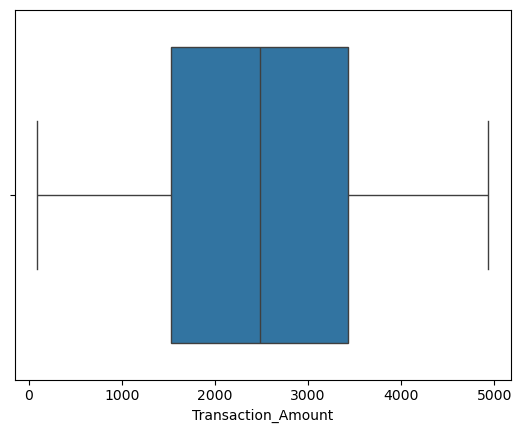

In [58]:
sns.boxplot(x=df['Transaction_Amount'])

<Axes: xlabel='Customer_Age'>

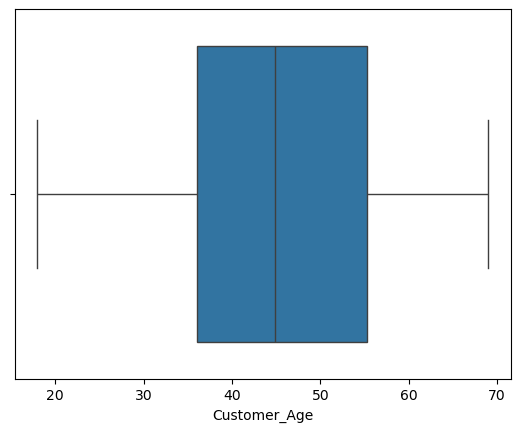

In [59]:
sns.boxplot(x=df['Customer_Age'])

<Axes: xlabel='Customer_Income'>

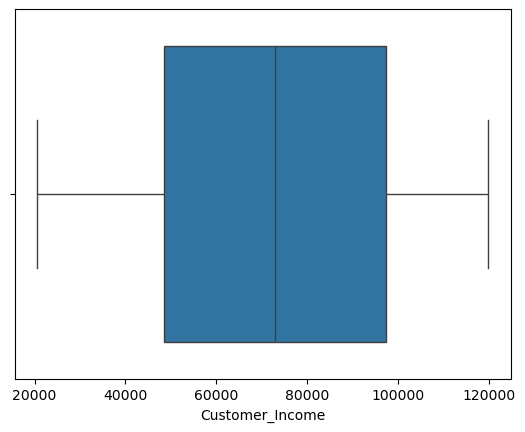

In [60]:
sns.boxplot(x=df['Customer_Income'])

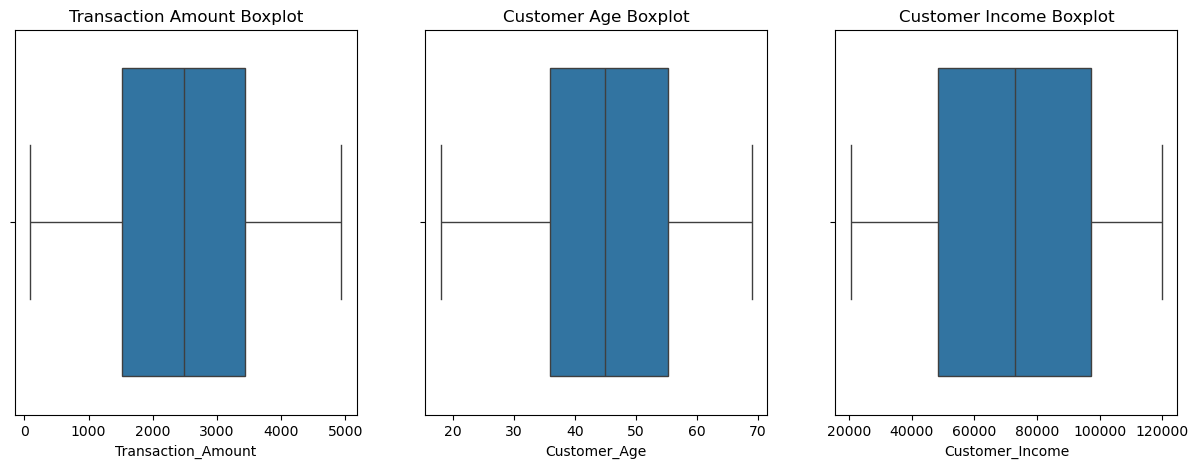

In [61]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.boxplot(x=df['Transaction_Amount'])
plt.title('Transaction Amount Boxplot')

plt.subplot(1, 3, 2)
sns.boxplot(x=df['Customer_Age'])
plt.title('Customer Age Boxplot')

plt.subplot(1, 3, 3)
sns.boxplot(x=df['Customer_Income'])
plt.title('Customer Income Boxplot')

plt.show()

In [62]:
Q1 = df['Transaction_Amount'].quantile(0.25)
Q3 = df['Transaction_Amount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers_transaction = df[(df['Transaction_Amount'] < lower_bound) | (df['Transaction_Amount'] > upper_bound)]
print("\nOutliers in Transaction_Amount (IQR):\n", outliers_transaction)


Outliers in Transaction_Amount (IQR):
 Empty DataFrame
Columns: [Transaction_ID, Customer_ID, Transaction_Amount, Merchant_ID, Merchant_Category, Card_Type, Is_Online, Is_Fraud, Customer_Age, Customer_Gender, Customer_Income, Transaction_City, Device_Type, Is_International]
Index: []


In [63]:
Q1_income = df['Customer_Income'].quantile(0.25)
Q3_income = df['Customer_Income'].quantile(0.75)
IQR_income = Q3_income - Q1_income
lower_bound_income = Q1_income - 1.5 * IQR_income
upper_bound_income = Q3_income + 1.5 * IQR_income
outliers_income = df[(df['Customer_Income'] < lower_bound_income) | (df['Customer_Income'] > upper_bound_income)]
print("\nOutliers in Customer_Income (IQR):\n", outliers_income)


Outliers in Customer_Income (IQR):
 Empty DataFrame
Columns: [Transaction_ID, Customer_ID, Transaction_Amount, Merchant_ID, Merchant_Category, Card_Type, Is_Online, Is_Fraud, Customer_Age, Customer_Gender, Customer_Income, Transaction_City, Device_Type, Is_International]
Index: []


### Histograms for numerical columns

The following Histograms visualize the distribution of numerical columns ('Transaction_Amount', 'Customer_Age', 'Customer_Income').

dropna() will be used to exclude missing values from the plots.

kde=True adds a kernel density estimation line. KDE will estimate in a non parametrical way the probability density function of a continuous random variable.

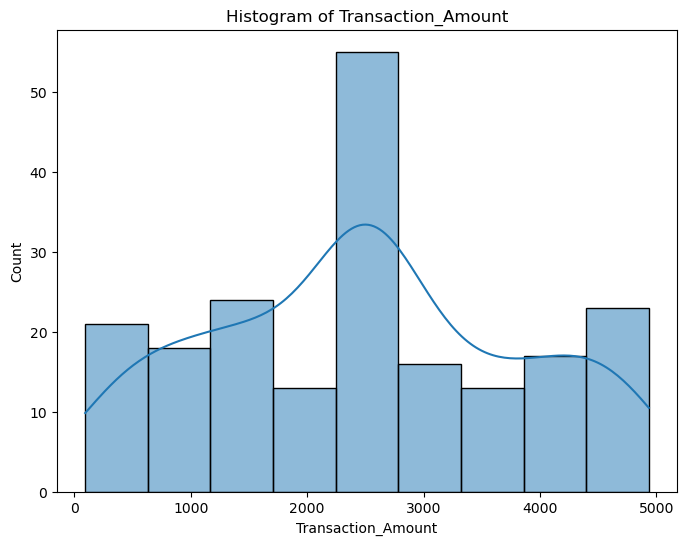

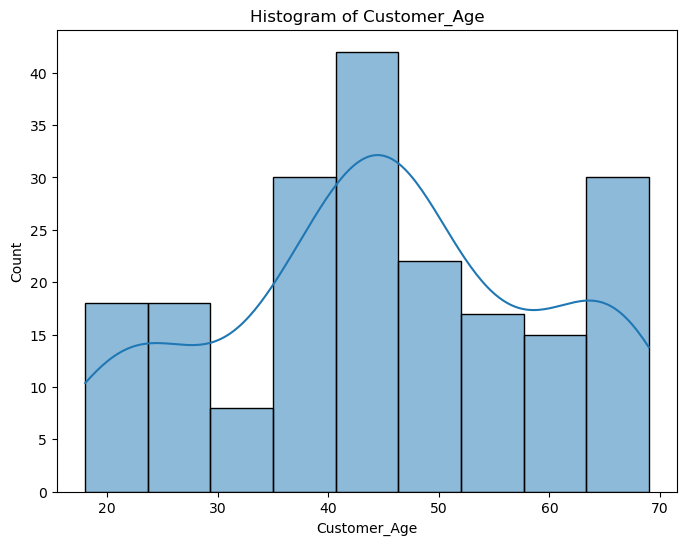

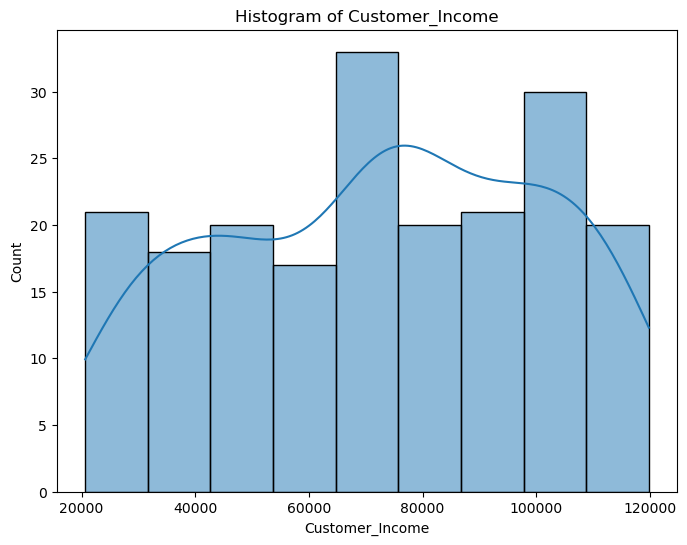

In [64]:
numerical_cols = ['Transaction_Amount', 'Customer_Age', 'Customer_Income']
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col].dropna(), kde=True)  
    plt.title(f'Histogram of {col}')
    plt.show()

Count plots for categorical columns

The Count plots will be used to visualize the frequency of each category in categorical columns ('Merchant_Category',
 'Card_Type',
 'Is_Online',
 'Is_Fraud',
 'Customer_Gender',
 'Transaction_City',
 'Device_Type',
 'Is_International').

This code was used for better readability: plt.xticks(rotation=45, ha='right')

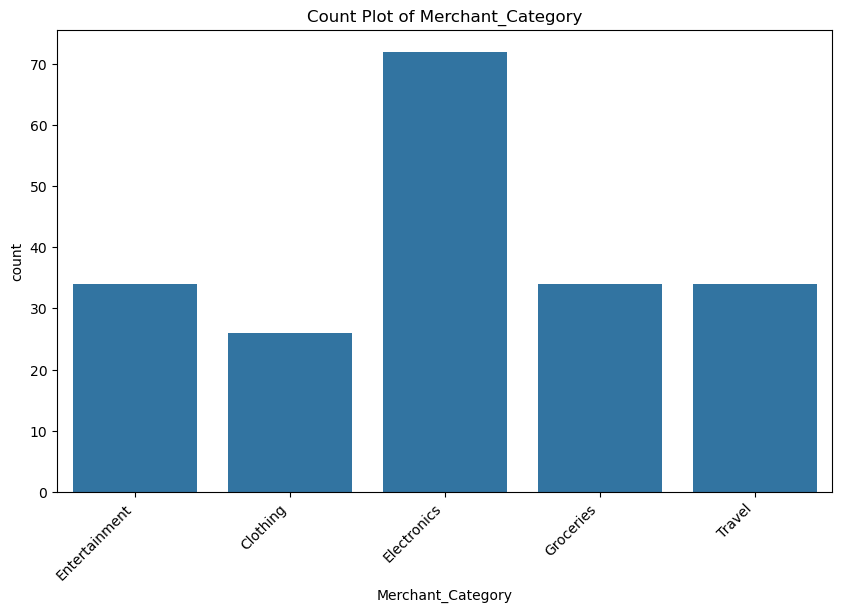

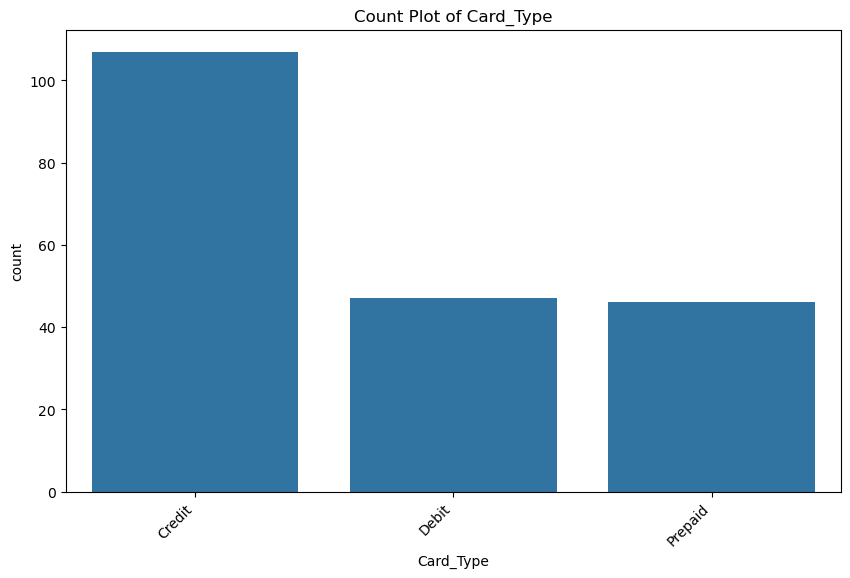

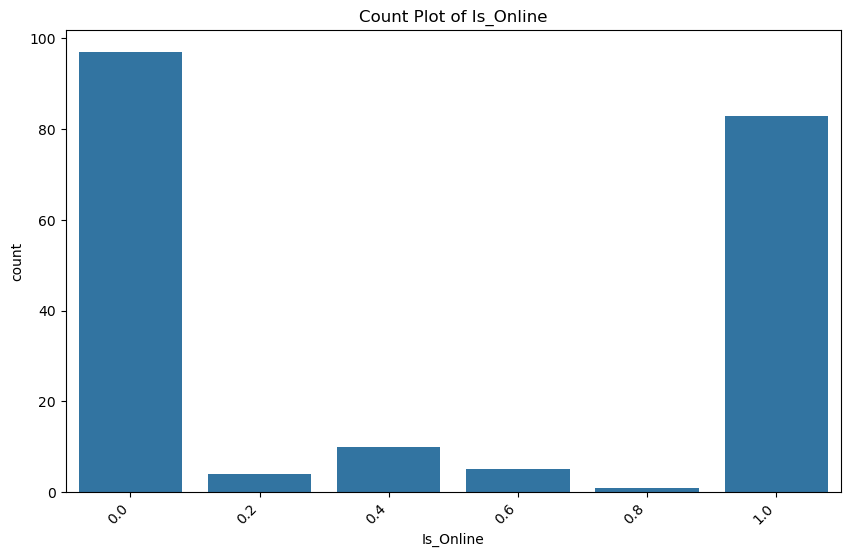

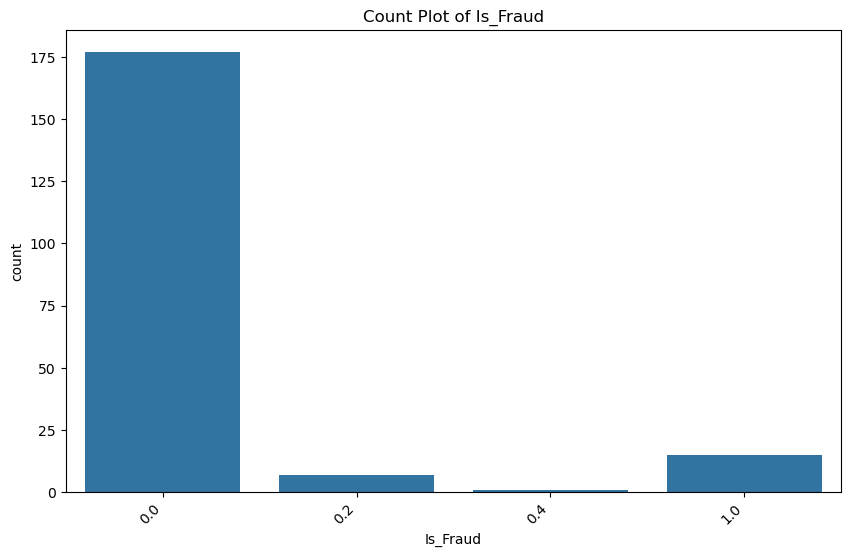

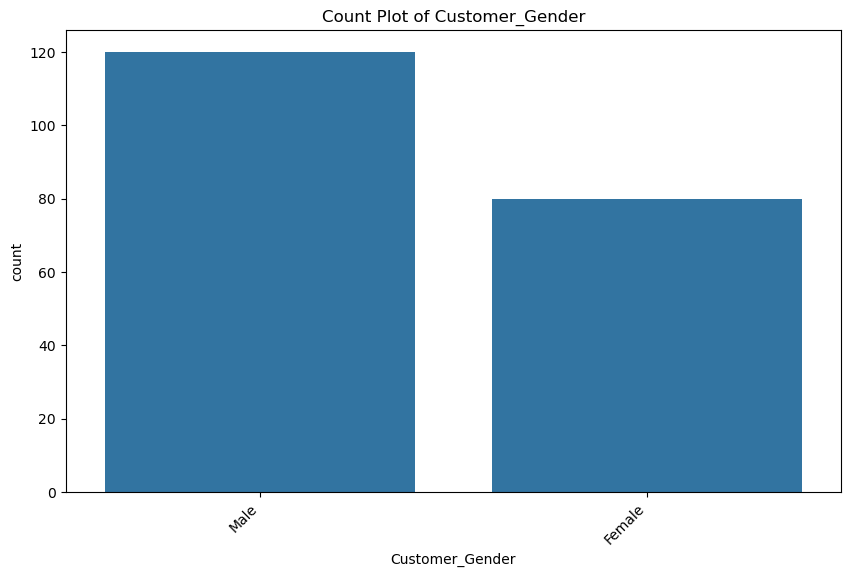

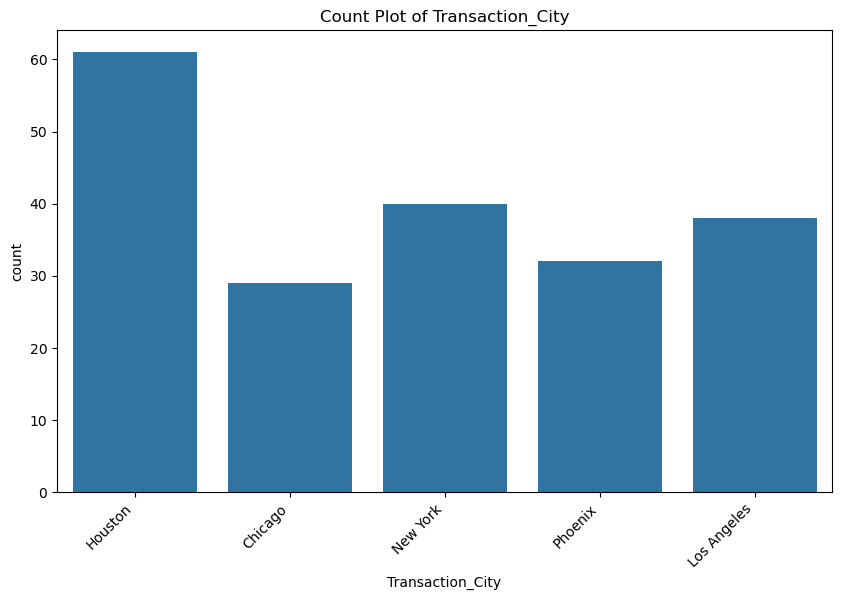

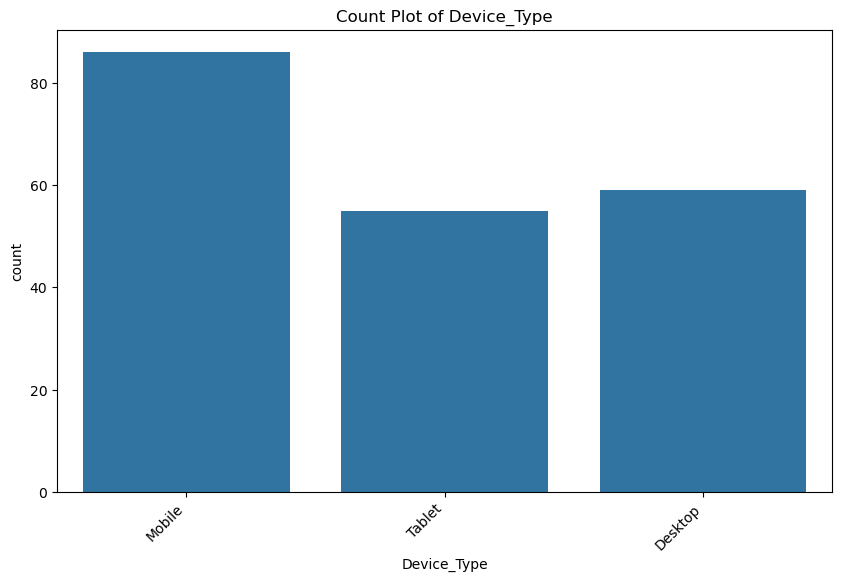

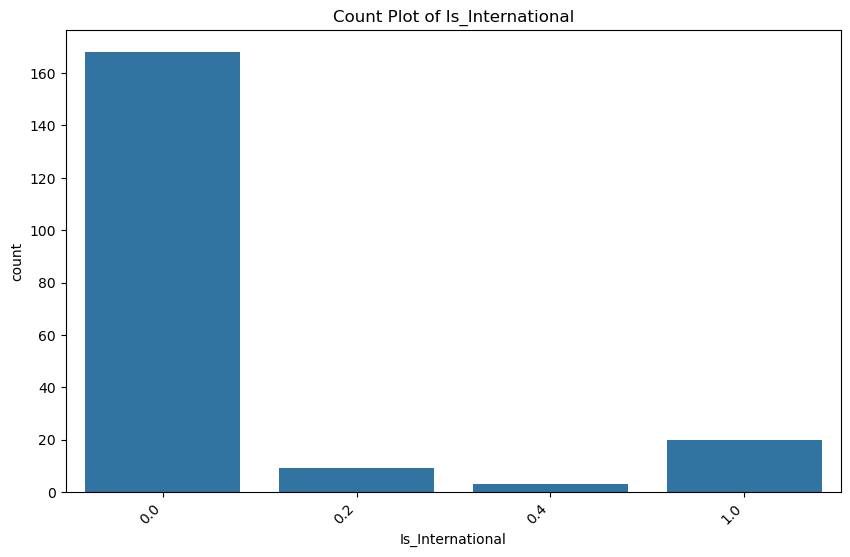

In [65]:
categorical_cols = ['Merchant_Category', 'Card_Type', 'Is_Online', 'Is_Fraud', 'Customer_Gender', 'Transaction_City', 'Device_Type', 'Is_International']
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=df[col])
    plt.title(f'Count Plot of {col}')
    plt.xticks(rotation=45, ha='right')  
    plt.show()

### Investigate Monthly transactions

I am curious to understand monthly transactions in my dataset

So I will further analyse monthly transactions.

First I will resample the data to monthly frequency, will continue by visualizing the sum and count by plotting a line plot.

In [66]:
monthly_transactions = df['Transaction_Amount'].resample('M').sum()
print(monthly_transactions)

Transaction_Date
2022-01-31    69979.785912
2022-02-28    73861.413285
2022-03-31    80258.363239
2022-04-30    76436.920814
2022-05-31    73998.951432
2022-06-30    70193.443024
2022-07-31    51996.705722
Freq: M, Name: Transaction_Amount, dtype: float64


I will now see the monthly transactions sum

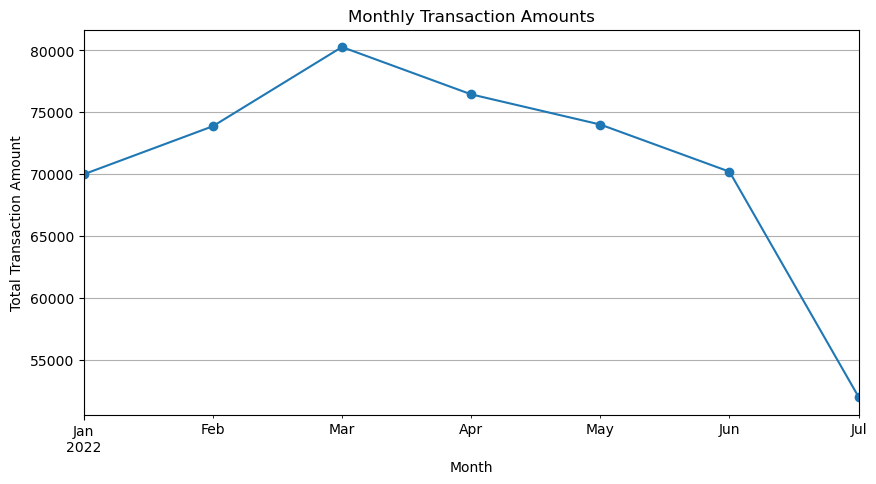

In [67]:
plt.figure(figsize=(10, 5))
monthly_transactions.plot(kind='line', marker='o')
plt.title('Monthly Transaction Amounts')
plt.xlabel('Month')
plt.ylabel('Total Transaction Amount')
plt.grid(True)
plt.show()

I will now count the monthly transaction sum

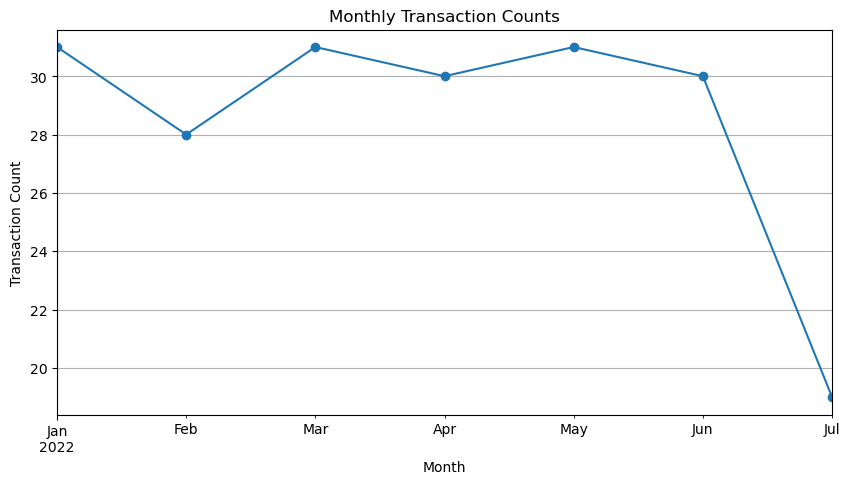

In [68]:
monthly_counts = df['Transaction_ID'].resample('M').count()

plt.figure(figsize=(10,5))
monthly_counts.plot(kind='line', marker='o')
plt.title('Monthly Transaction Counts')
plt.xlabel('Month')
plt.ylabel('Transaction Count')
plt.grid(True)
plt.show()

### Dropping columns

For my specific research I will drop the Transaction_ID, Customer_ID and Merchant_ID columns, as they have no real relevance towards my research.

In [69]:
df.drop(['Transaction_ID', 'Customer_ID', 'Merchant_ID'],inplace=True,axis=1)

In [70]:
df

,Transaction_Amount,Merchant_Category,Card_Type,Is_Online,Is_Fraud,Customer_Age,Customer_Gender,Customer_Income,Transaction_City,Device_Type,Is_International
Transaction_Date,,,,,,,,,,,
2022-01-01,1878.955193,Entertainment,Credit,0.0,0.0,59.000000,Male,72922.29116,Houston,Mobile,0.0
2022-01-02,4754.064389,Clothing,Debit,0.0,0.0,66.000000,Male,106204.26510,Houston,Mobile,1.0
2022-01-03,3662.649770,Electronics,Prepaid,0.0,0.0,44.877778,Female,104454.93990,Chicago,Tablet,0.0
2022-01-04,2997.305836,Entertainment,Credit,0.0,0.0,48.000000,Male,51910.04732,New York,Tablet,0.0
2022-01-05,788.533016,Electronics,Credit,0.0,0.0,44.877778,Female,102891.54740,Phoenix,Tablet,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2022-07-15,1752.555777,Clothing,Debit,1.0,0.0,63.000000,Female,115086.35620,Los Angeles,Mobile,0.0
2022-07-16,2483.627917,Electronics,Credit,0.0,0.0,40.000000,Male,35105.78918,Chicago,Tablet,0.2
2022-07-17,2483.627917,Entertainment,Credit,0.0,1.0,49.000000,Male,63233.48010,Phoenix,Tablet,0.0


### Visualizations

Count plots for categorical columns
The Count plots will be used to visualize the frequency of each category in categorical columns 'Merchant_Category',
 'Card_Type',
 'Is_Online',
 'Is_Fraud',
 'Customer_Gender',
 'Transaction_City',
 'Device_Type',
 'Is_International').

This code was used for better readability: plt.xticks(rotation=45, ha='right')

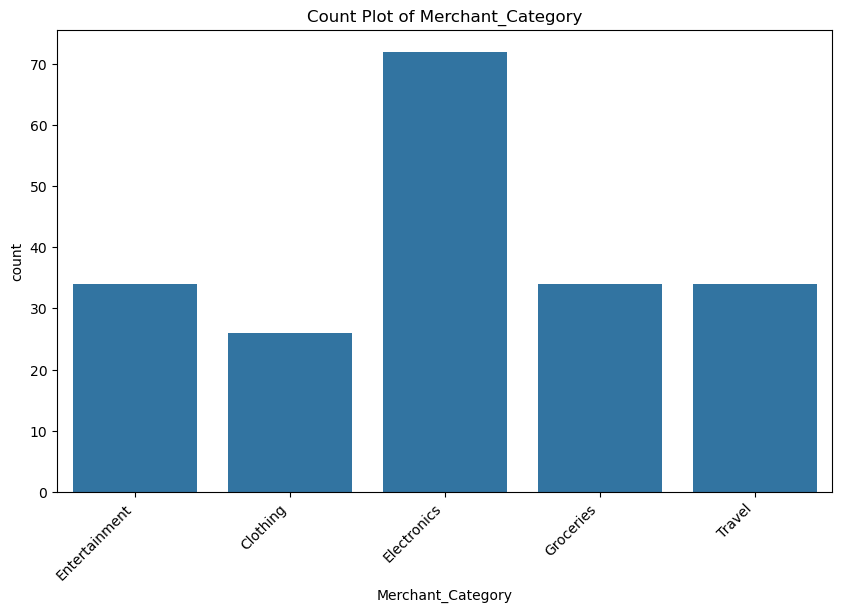

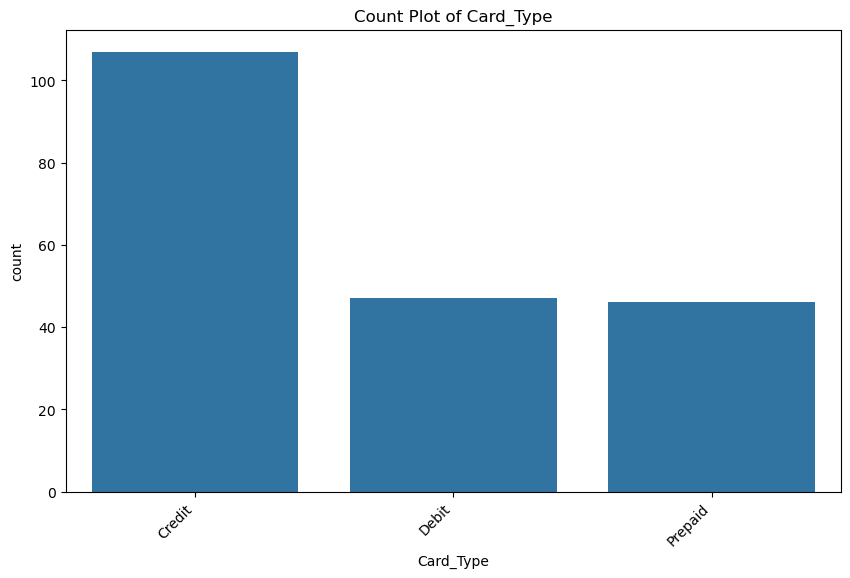

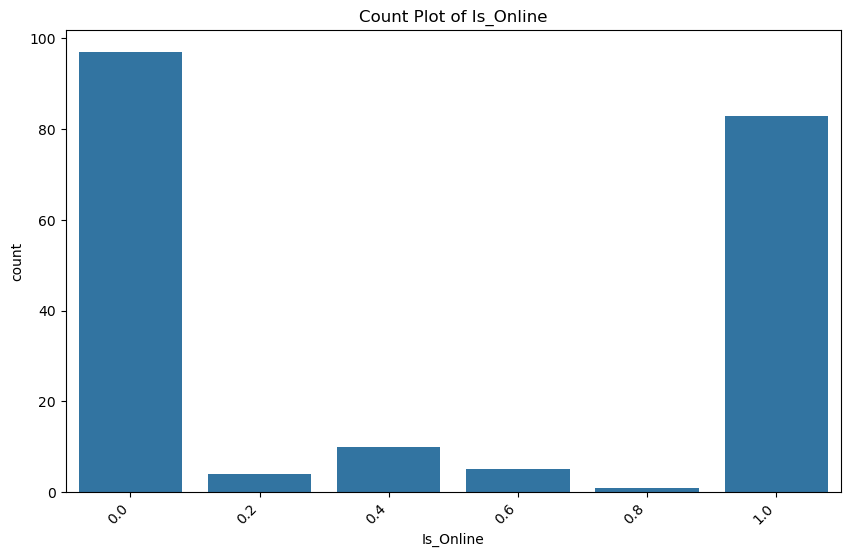

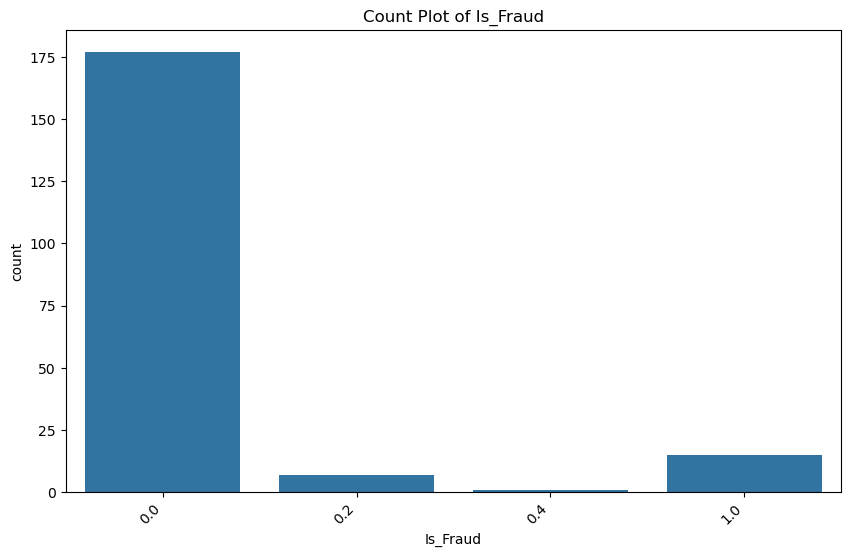

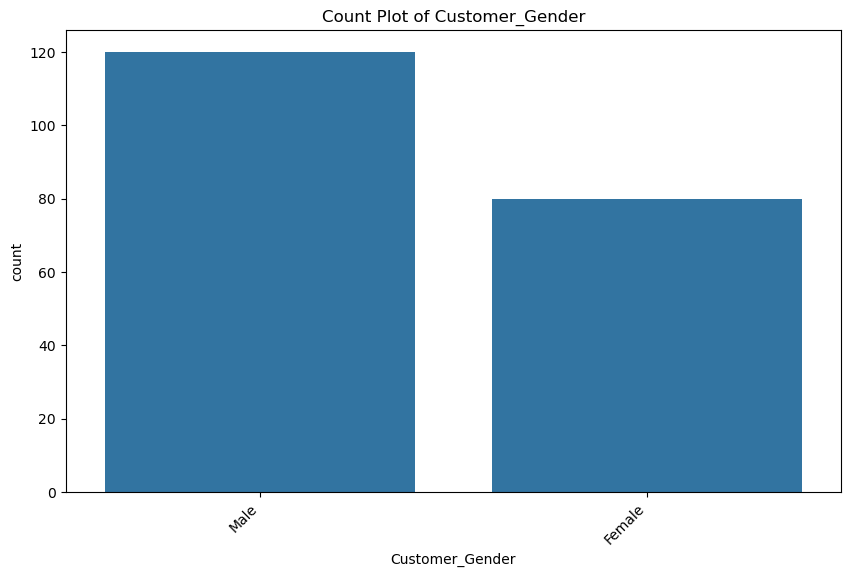

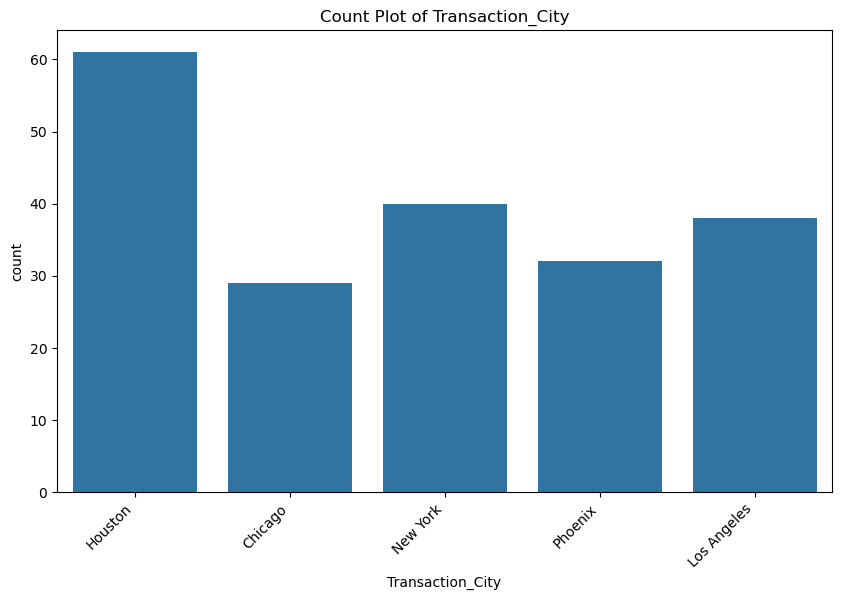

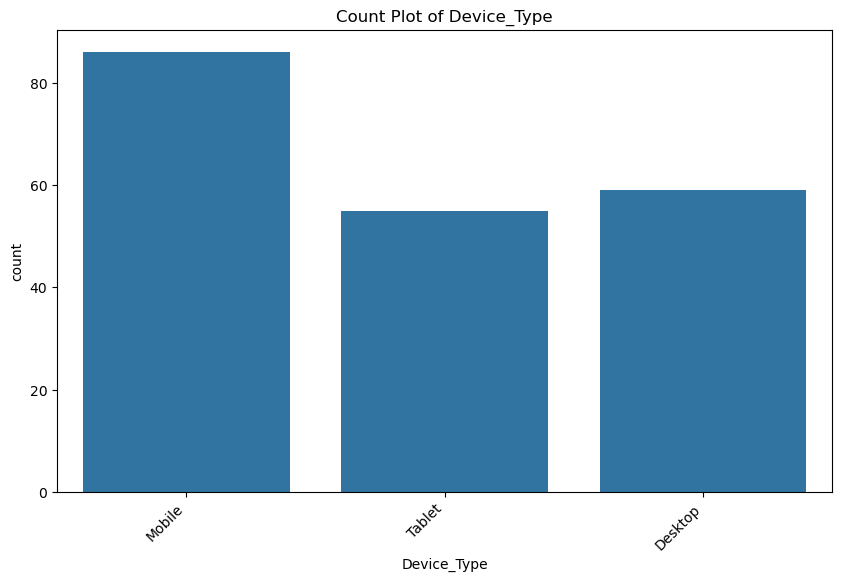

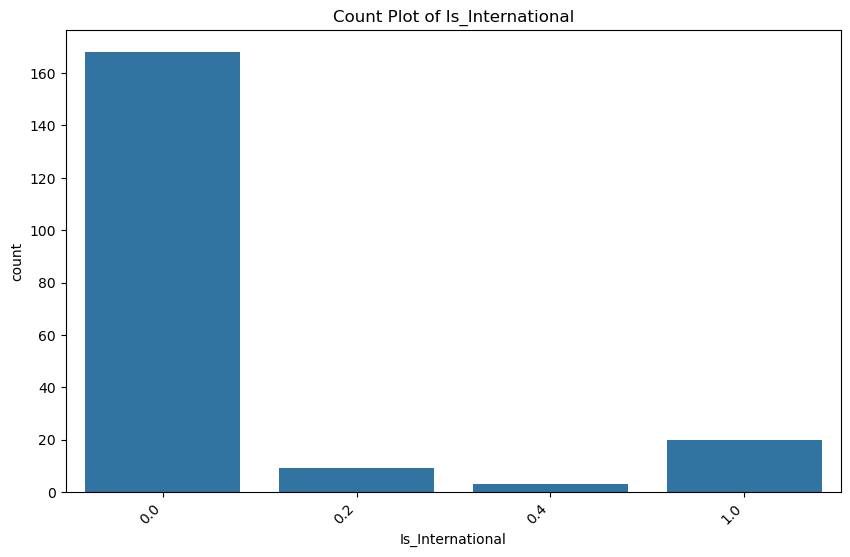

In [71]:
categorical_cols = ['Merchant_Category', 'Card_Type', 'Is_Online', 'Is_Fraud', 'Customer_Gender', 'Transaction_City', 'Device_Type', 'Is_International']
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=df[col])
    plt.title(f'Count Plot of {col}')
    plt.xticks(rotation=45, ha='right')  
    plt.show()

### Pie Chart

The following code will generate pie charts for each of the categorical columns in the dataset, providing a clear visual representation of the distribution of different categories within each column.

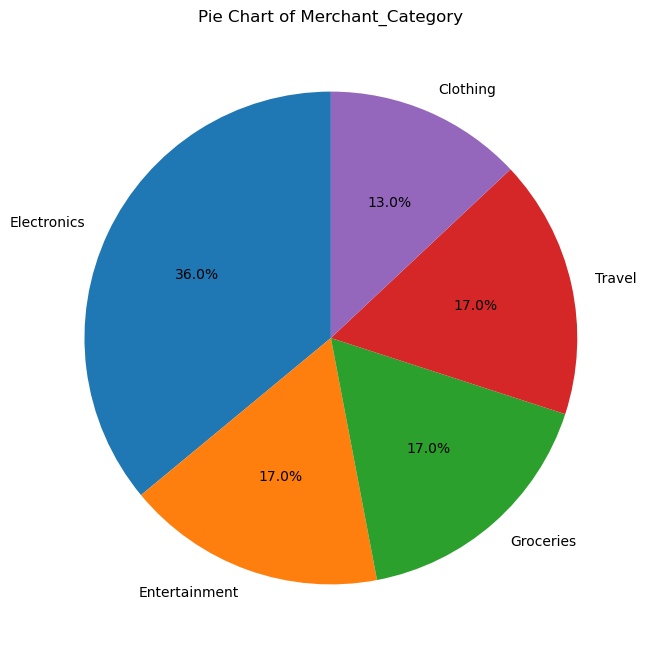

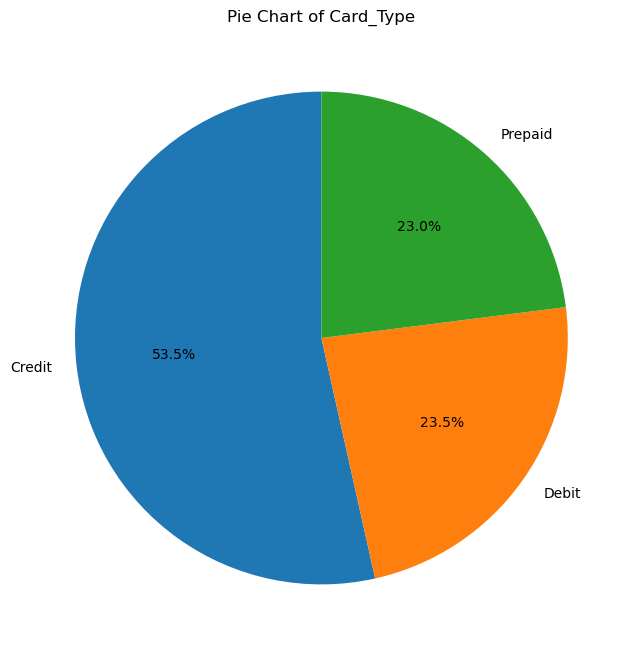

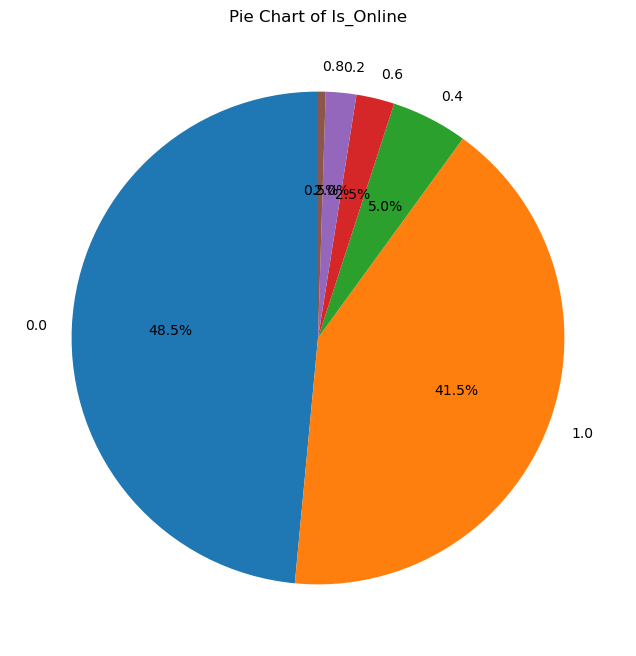

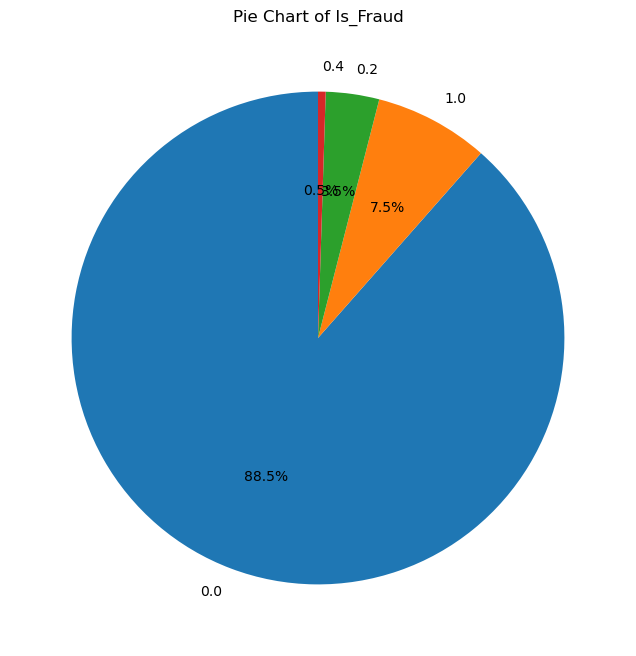

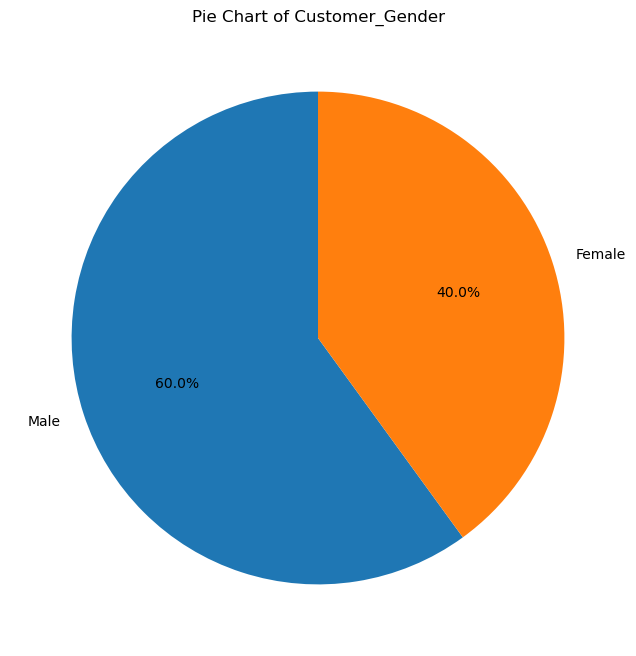

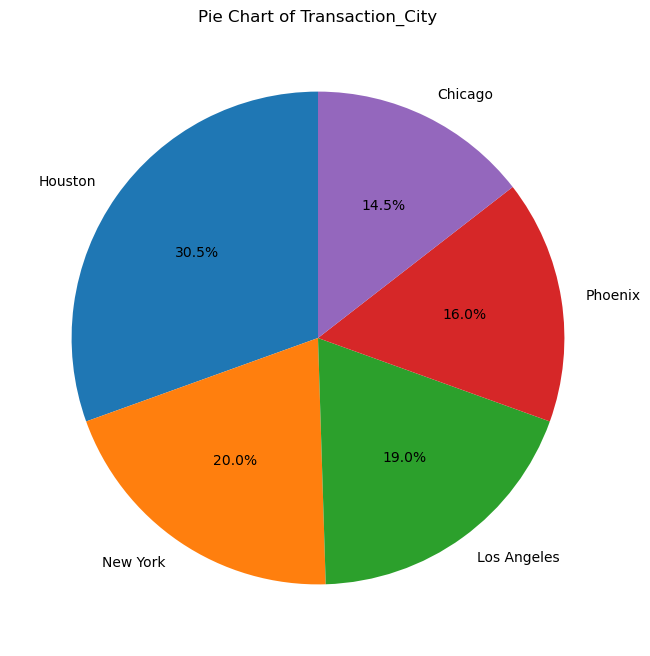

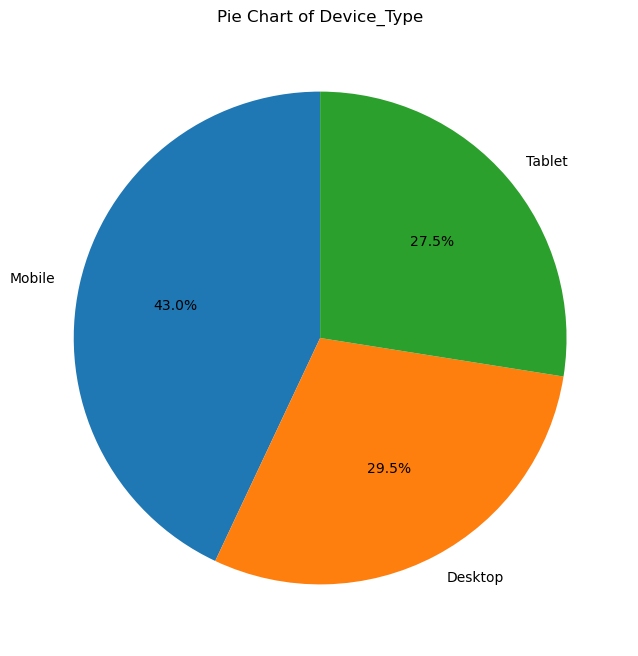

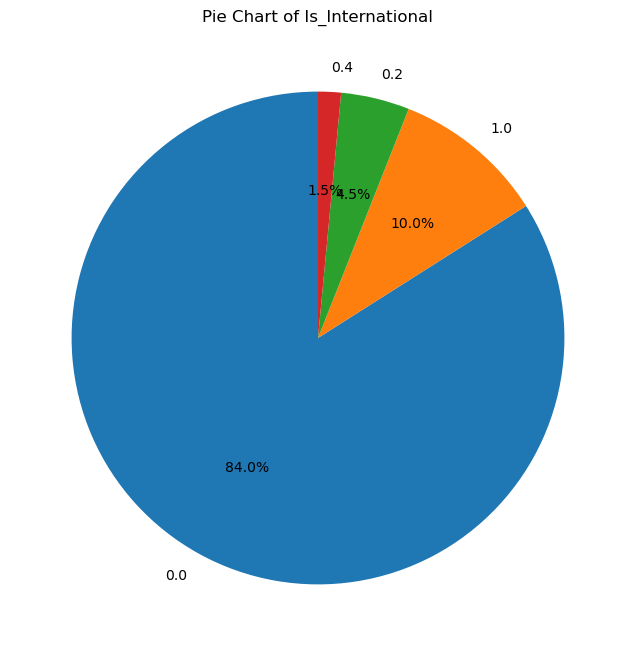

In [72]:
for col in categorical_cols:
    plt.figure(figsize=(8, 8))
    df[col].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
    plt.title(f'Pie Chart of {col}')
    plt.ylabel('')  
    plt.show()

### Distribution

I used multiple count plots and value counts to show the categorical statuses.

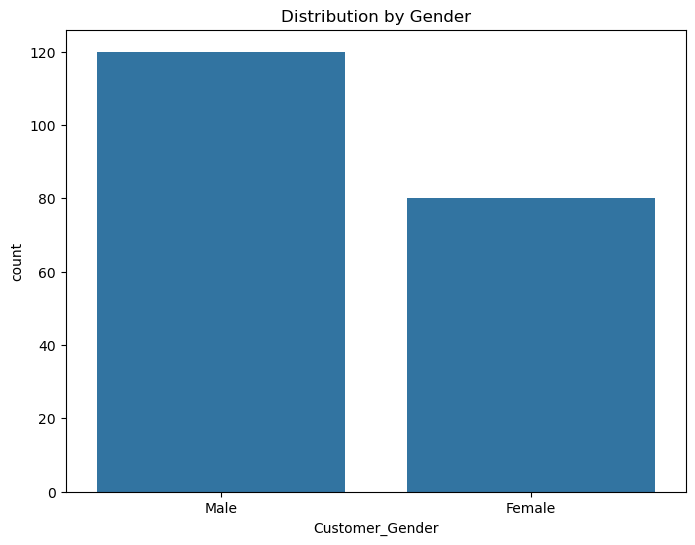

Male      120
Female     80
Name: Customer_Gender, dtype: int64


In [73]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Customer_Gender', data=df)
plt.title('Distribution by Gender')
plt.show()
print(df['Customer_Gender'].value_counts())

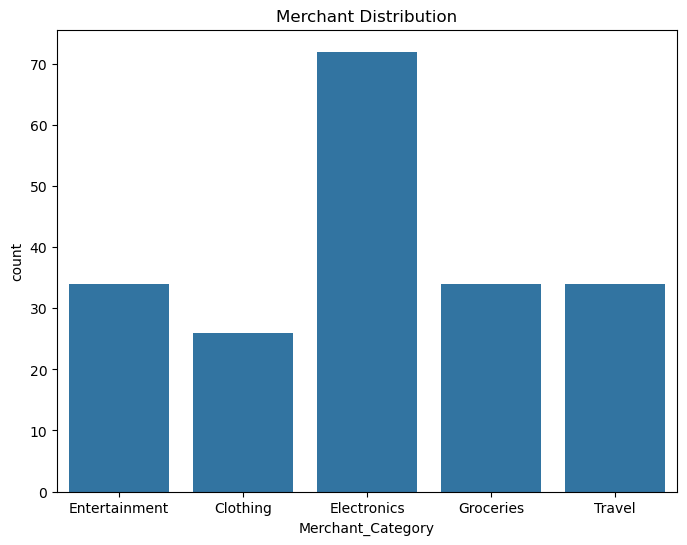

Electronics      72
Entertainment    34
Groceries        34
Travel           34
Clothing         26
Name: Merchant_Category, dtype: int64


In [74]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Merchant_Category', data=df)
plt.title('Merchant Distribution')
plt.show()
print(df['Merchant_Category'].value_counts())

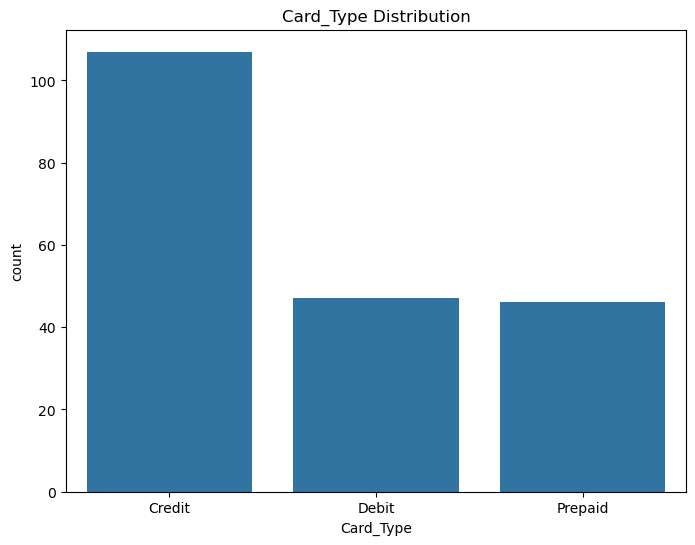

Credit     107
Debit       47
Prepaid     46
Name: Card_Type, dtype: int64


In [75]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Card_Type', data=df)
plt.title('Card_Type Distribution')
plt.show()
print(df['Card_Type'].value_counts())

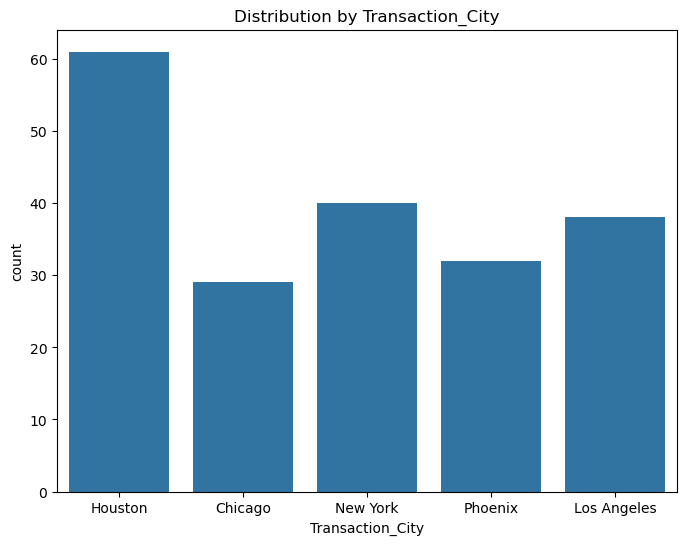

Houston        61
New York       40
Los Angeles    38
Phoenix        32
Chicago        29
Name: Transaction_City, dtype: int64


In [76]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Transaction_City', data=df)
plt.title('Distribution by Transaction_City')
plt.show()
print(df['Transaction_City'].value_counts())

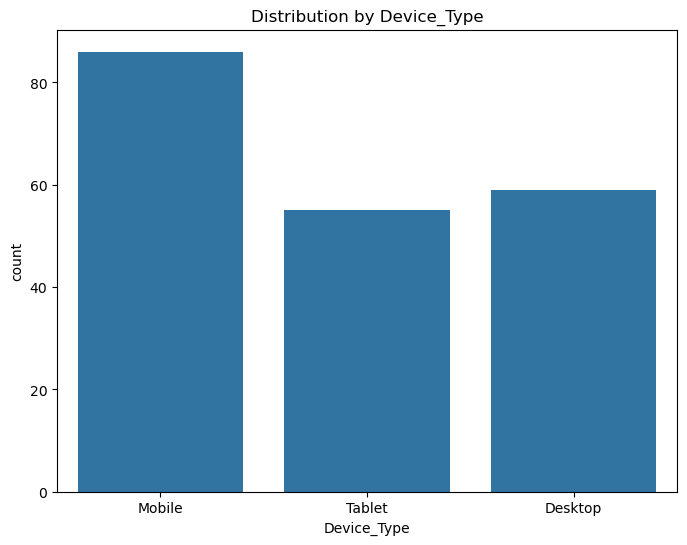

Mobile     86
Desktop    59
Tablet     55
Name: Device_Type, dtype: int64


In [77]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Device_Type', data=df)
plt.title('Distribution by Device_Type')
plt.show()
print(df['Device_Type'].value_counts())

### Correlation Heatmap

Correlation and regression analysis are related in the sense that both deal with relationships among variables. The correlation coefficient is a measure of linear association between two variables. The values of the correlation coefficient are always between -1 and +1. A correlation coefficient of +1 indicates that two variables are perfectly related in a positive linear sense, a correlation coefficient of -1 indicates that two variables are perfectly related in a negative linear sense, and a correlation coefficient of 0 indicates that there is no linear relationship between the two variables.

For this plot, I will use functions from pandas and scipy.stats. The correlation matrix for numerical columns will be calculated using corr() and the correlation matrix for categorical columns will performed using chi2_contingency()

In [78]:
from scipy.stats import chi2_contingency

Lets now visualize the correlation between all variables

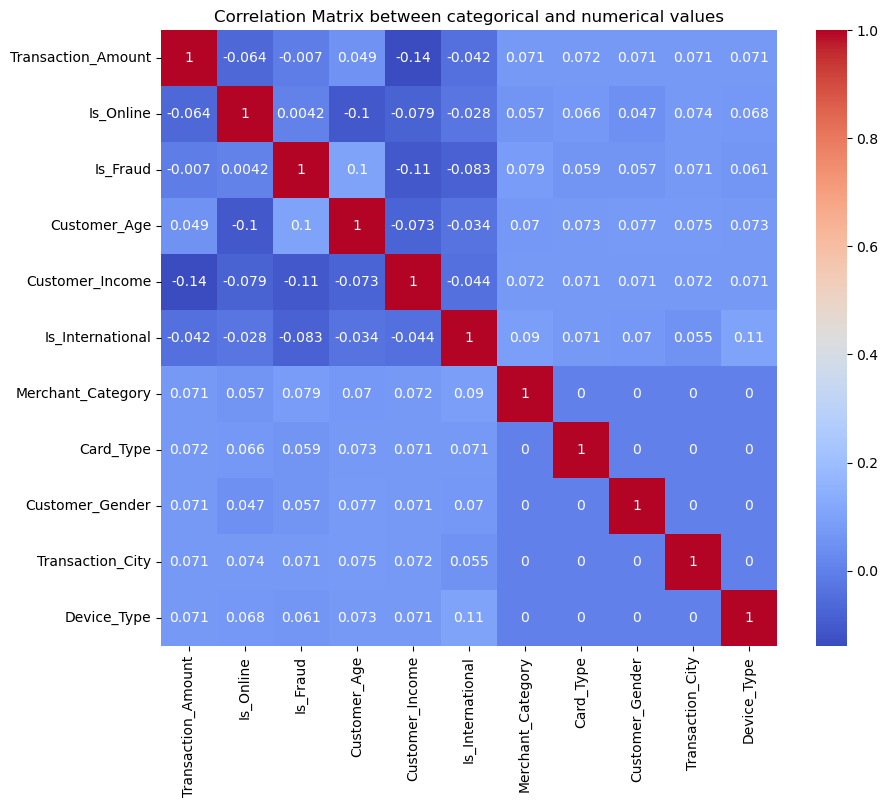

In [79]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(exclude=['int64', 'float64']).columns

corr_matrix_num = df[numerical_cols].corr()

corr_matrix_cat = np.zeros((len(categorical_cols), len(numerical_cols)))
for i, cat_col in enumerate(categorical_cols):
    for j, num_col in enumerate(numerical_cols):
        contingency_table = pd.crosstab(df[cat_col], df[num_col])
        chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)
        corr_matrix_cat[i, j] = np.sqrt(chi2_stat / (dof * (contingency_table.sum().sum())))

corr_matrix = np.block([[corr_matrix_num, corr_matrix_cat.T],
                        [corr_matrix_cat, np.eye(len(categorical_cols))]])

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True,
            xticklabels=list(numerical_cols) + list(categorical_cols),
            yticklabels=list(numerical_cols) + list(categorical_cols))
plt.title('Correlation Matrix between categorical and numerical values')
plt.show()

Findings:

I can see that highest correlation is between Customer_Age and Is_Fraud

I will now check the correlation between numerical columns

In [80]:
numerical_cols

Index(['Transaction_Amount', 'Is_Online', 'Is_Fraud', 'Customer_Age',
       'Customer_Income', 'Is_International'],
      dtype='object')

In [81]:
correlation = df[numerical_cols].corr(method='pearson')
columns = correlation.nlargest(10, 'Is_Fraud').index
columns

Index(['Is_Fraud', 'Customer_Age', 'Is_Online', 'Transaction_Amount',
       'Is_International', 'Customer_Income'],
      dtype='object')

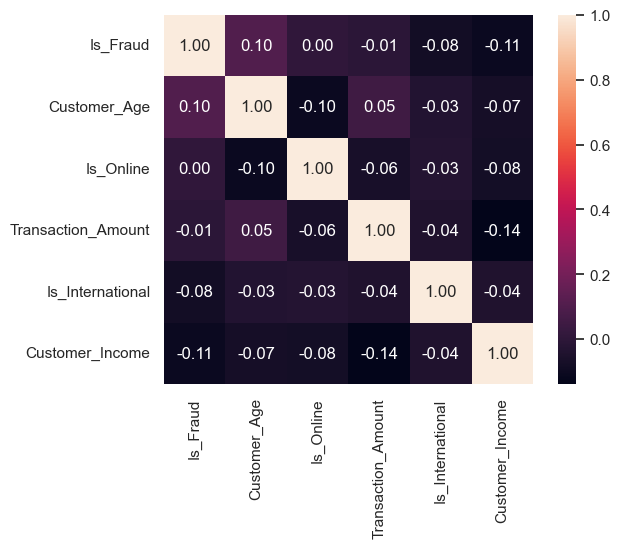

In [82]:
correlation_map = np.corrcoef(df[columns].values.T)
sns.set(font_scale=1.0)
heatmap = sns.heatmap(correlation_map, cbar=True, annot=True, square=True, fmt='.2f', yticklabels=columns.values, xticklabels=columns.values)

plt.show()

In [83]:
df[numerical_cols].corr()

,Transaction_Amount,Is_Online,Is_Fraud,Customer_Age,Customer_Income,Is_International
Transaction_Amount,1.000000,-0.064300,-0.006986,0.048509,-0.139351,-0.042167
Is_Online,-0.064300,1.000000,0.004191,-0.104898,-0.079058,-0.028370
Is_Fraud,-0.006986,0.004191,1.000000,0.104201,-0.106562,-0.083372
Customer_Age,0.048509,-0.104898,0.104201,1.000000,-0.073481,-0.033545
Customer_Income,-0.139351,-0.079058,-0.106562,-0.073481,1.000000,-0.044461
Is_International,-0.042167,-0.028370,-0.083372,-0.033545,-0.044461,1.000000


Findings:
    
Are exactly the same as previously

#### Customer_Age

After observing the correlation between CustomerAge and Is_Fraud, I want to further analyse the column Customer_Age

In [84]:
print("--- Descriptive Statistics ---")
print(df['Customer_Age'].describe())

--- Descriptive Statistics ---
count    200.000000
mean      44.877778
std       14.472867
min       18.000000
25%       36.000000
50%       44.877778
75%       55.250000
max       69.000000
Name: Customer_Age, dtype: float64


In [85]:
print("\n--- Unique Values ---")
print("Number of unique values:", df['Customer_Age'].nunique())
print("Unique values:", df['Customer_Age'].unique())



--- Unique Values ---
Number of unique values: 51
Unique values: [59.         66.         44.87777778 48.         68.         31.
 57.         39.         28.         40.         18.         63.
 54.         38.         43.         53.         32.         64.
 26.         27.         69.         58.         52.         55.
 19.         24.         35.         44.         51.         60.
 61.         41.         42.         23.         50.         46.
 45.         67.         34.         37.         49.         47.
 36.         21.         25.         56.         20.         33.
 65.         22.         29.        ]


I will now create a Histogram to visualze the Distribution of customer age and frequency

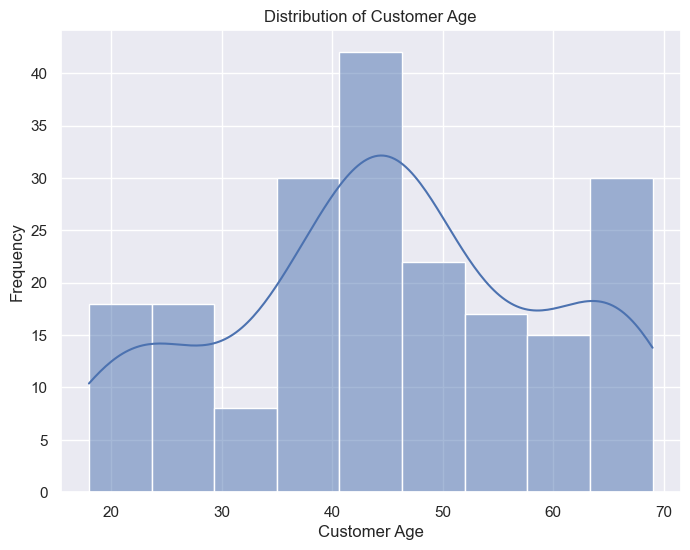

In [86]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Customer_Age'], kde=True)
plt.title('Distribution of Customer Age')
plt.xlabel('Customer Age')
plt.ylabel('Frequency')
plt.show()

Finding:

We can see that the frequency of customer age is higher over 40


In the next plot I will create a line plot with markers to visualize the calculation of average (mean) of Customer_Age column for each transaction date.

Transaction_Date
2022-01-01    59.000000
2022-01-02    66.000000
2022-01-03    44.877778
2022-01-04    48.000000
2022-01-05    44.877778
                ...    
2022-07-15    63.000000
2022-07-16    40.000000
2022-07-17    49.000000
2022-07-18    34.000000
2022-07-19    67.000000
Name: Customer_Age, Length: 200, dtype: float64


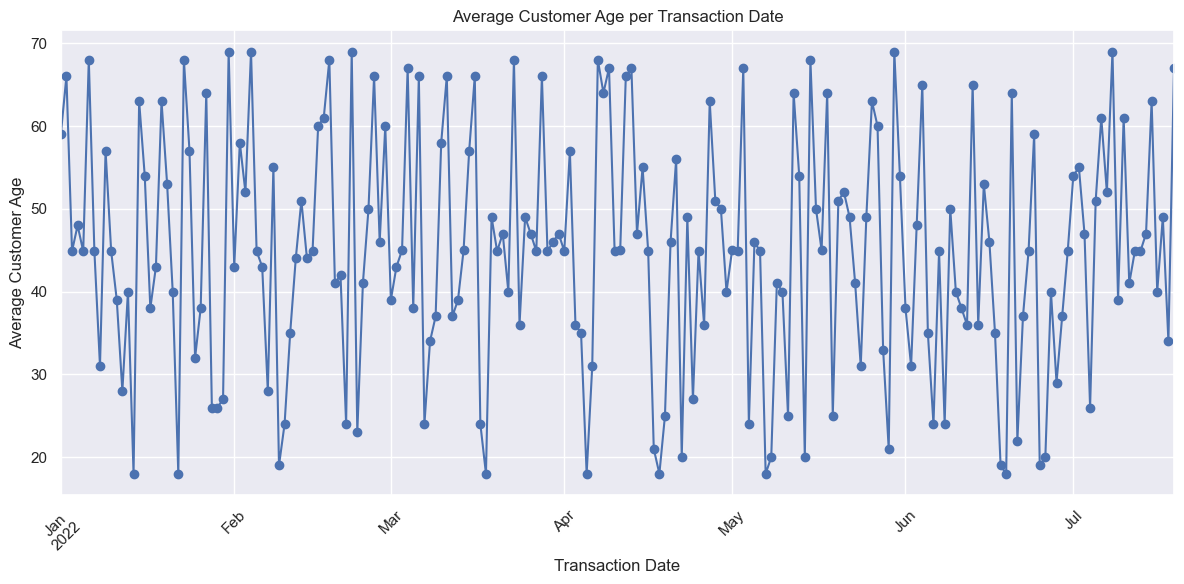

In [87]:
average_age_per_transaction = df.groupby('Transaction_Date')['Customer_Age'].mean()

print(average_age_per_transaction)


plt.figure(figsize=(12, 6))
average_age_per_transaction.plot(marker='o')
plt.title('Average Customer Age per Transaction Date')
plt.xlabel('Transaction Date')
plt.ylabel('Average Customer Age')
plt.grid(True)
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()

I will now create a boxplot and a scatterplot to visualize the age with the highest correlation with Is_Fraud

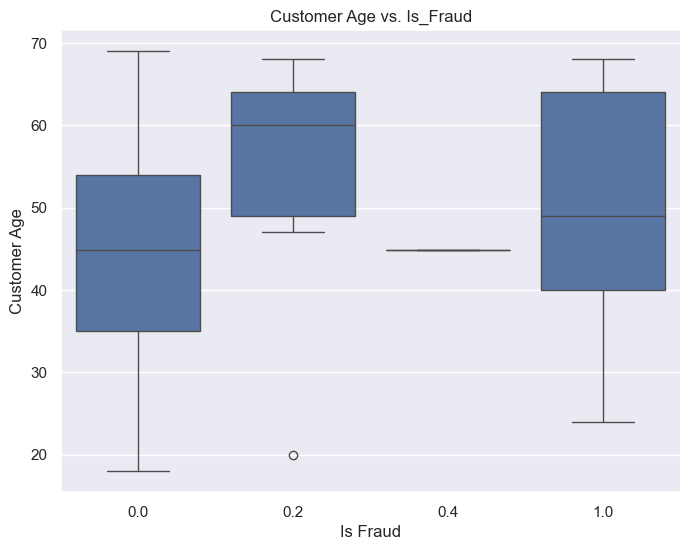

In [88]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Is_Fraud', y='Customer_Age', data=df)
plt.title('Customer Age vs. Is_Fraud')
plt.xlabel('Is Fraud')
plt.ylabel('Customer Age')
plt.show()

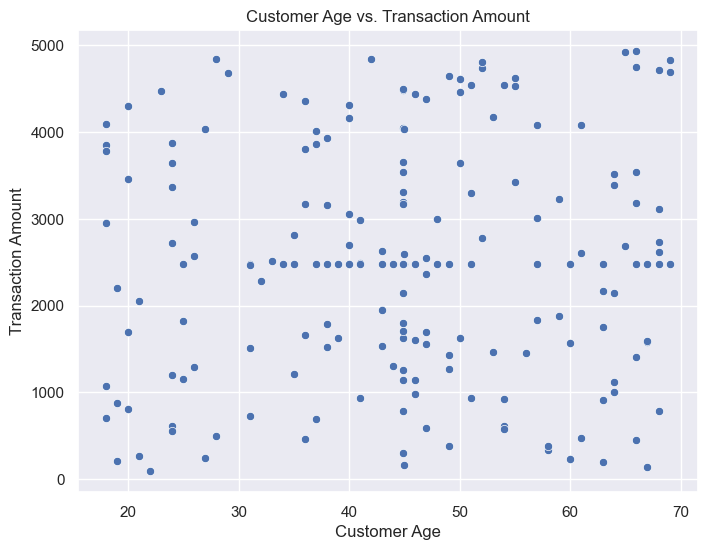

In [89]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Customer_Age', y='Transaction_Amount', data=df)
plt.title('Customer Age vs. Transaction Amount')
plt.xlabel('Customer Age')
plt.ylabel('Transaction Amount')
plt.show()

array([[<Axes: title={'center': 'Transaction_Amount'}>,
        <Axes: title={'center': 'Is_Online'}>],
       [<Axes: title={'center': 'Is_Fraud'}>,
        <Axes: title={'center': 'Customer_Age'}>],
       [<Axes: title={'center': 'Customer_Income'}>,
        <Axes: title={'center': 'Is_International'}>]], dtype=object)

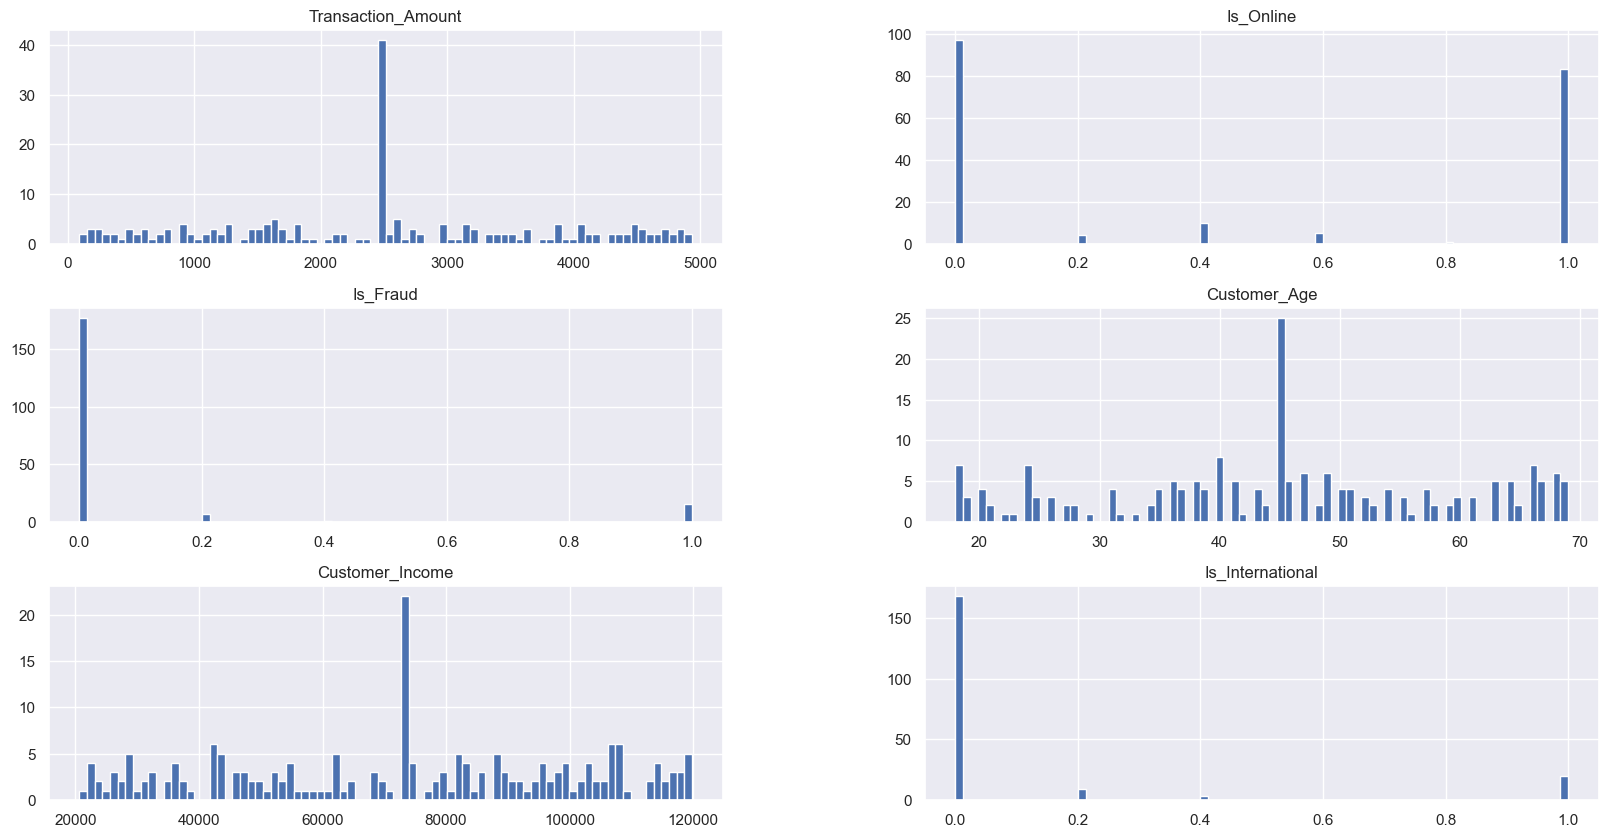

In [90]:
df.hist(bins=80, figsize=(20,10))

In [91]:
groups = df.groupby('Is_Fraud')

for key, item in groups:
    print(groups.get_group(key), "\n\n")

                  Transaction_Amount Merchant_Category Card_Type  Is_Online  \
Transaction_Date                                                              
2022-01-01               1878.955193     Entertainment    Credit        0.0   
2022-01-02               4754.064389          Clothing     Debit        0.0   
2022-01-03               3662.649770       Electronics   Prepaid        0.0   
2022-01-04               2997.305836     Entertainment    Credit        0.0   
2022-01-05                788.533016       Electronics    Credit        0.0   
...                              ...               ...       ...        ...   
2022-07-14               1701.758657          Clothing     Debit        0.0   
2022-07-15               1752.555777          Clothing     Debit        1.0   
2022-07-16               2483.627917       Electronics    Credit        0.0   
2022-07-18               4436.561257          Clothing   Prepaid        0.0   
2022-07-19               2483.627917       Electroni

## Data Preprocessing

I will now convert categorical columns into numerical using Label Encoding  in order to perform Logistic Regression.

I will now convert categorical columns using Label Encoder.

In [92]:
le = LabelEncoder()
df['Merchant_Category'] = le.fit_transform(df['Merchant_Category'])
df['Card_Type'] = le.fit_transform(df['Card_Type'])
df['Customer_Gender'] = le.fit_transform(df['Customer_Gender'])
df['Device_Type'] = le.fit_transform(df['Device_Type'])

### Normalize Data

In [93]:
scaler = StandardScaler()
df[['Transaction_Amount', 'Customer_Income']] = scaler.fit_transform(df[['Transaction_Amount', 'Customer_Income']])

I will now calculate the Z-scores for each transaction amount

In [94]:
def detect_outliers_zscore(data, threshold=3):
    z_scores = np.abs((data - data.mean()) / data.std())
    return z_scores > threshold

outlier_mask = detect_outliers_zscore(df['Transaction_Amount'])
print("Outliers (Z-score):\n", df[outlier_mask])


Outliers (Z-score):
 Empty DataFrame
Columns: [Transaction_Amount, Merchant_Category, Card_Type, Is_Online, Is_Fraud, Customer_Age, Customer_Gender, Customer_Income, Transaction_City, Device_Type, Is_International]
Index: []


## Logistic Regression

In [95]:
df

,Transaction_Amount,Merchant_Category,Card_Type,Is_Online,Is_Fraud,Customer_Age,Customer_Gender,Customer_Income,Transaction_City,Device_Type,Is_International
Transaction_Date,,,,,,,,,,,
2022-01-01,-0.461352,2,0,0.0,0.0,59.000000,1,1.025281e-15,Houston,1,0.0
2022-01-02,1.732295,0,1,0.0,0.0,66.000000,1,1.172471e+00,Houston,1,1.0
2022-01-03,0.899569,1,2,0.0,0.0,44.877778,0,1.110845e+00,Chicago,2,0.0
2022-01-04,0.391925,2,0,0.0,0.0,48.000000,1,-7.402278e-01,New York,2,0.0
2022-01-05,-1.293321,1,0,0.0,0.0,44.877778,0,1.055769e+00,Phoenix,2,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2022-07-15,-0.557793,0,1,1.0,0.0,63.000000,0,1.485373e+00,Los Angeles,1,0.0
2022-07-16,0.000000,1,0,0.0,0.0,40.000000,1,-1.332215e+00,Chicago,2,0.2
2022-07-17,0.000000,2,0,0.0,1.0,49.000000,1,-3.413213e-01,Phoenix,2,0.0


### One hot encoding:

I can see that Transaction city is still string, therefore I will use one hot encoding.
One hot encoding is process which is used to convert categorical features into numerical features by converting catageries into integers by creating a new column with a 1 or 0

One-Hot Encoding will handle_unknown='ignore' and deal with unseen categories.

In [96]:
df = pd.get_dummies(df, columns=['Merchant_Category', 'Card_Type', 'Transaction_City', 'Device_Type','Customer_Gender'])



### Logistic Regression Model

Logistic regression is a statistical method used primarily for binary classification, where the goal is to predict the probability of an outcome that can be in one of two categories. It extends the idea of linear regression but is particularly well-suited for scenarios where the target variable is categorical, like "yes" or "no" and "spam" or "not spam."

Logistic regression applies a logistic (sigmoid) function to squeeze the output between 0 and 1. This makes it ideal for producing probabilities for class membership, where values closer to 0 represent one class, and those closer to 1 represent the other. The model calculates an odds ratio, which represents the likelihood of a certain class occurring as compared to the alternative, and this probability is then mapped to the sigmoid function for a final prediction.

In logistic regression, training the model involves finding the optimal coefficients that minimize a cost function, often using maximum likelihood estimation. The cost function measures how far the predicted probabilities are from the actual labels, and gradient descent is commonly used to adjust the weights iteratively to improve prediction accuracy.

Additionally, the algorithm is widely valued for its simplicity and interpretability, as each coefficient provides insight into the relationship between a feature and the likelihood of a specific outcome, which makes it especially useful in fields like medicine, finance, and social sciences.

I will now Separate features (X) and target (y)

In [97]:
X = df.drop('Is_Fraud', axis=1)
y = df['Is_Fraud']

### Scaling

I will now scale the numerical features

In [98]:
numerical_features = ['Transaction_Amount','Customer_Age','Customer_Income','Is_International']
scaler = StandardScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])
y = y.astype(int)

### Data Split

I will now split data into training and testing sets

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In the next step I will:

Train the Logistic Regression Model 

Make predictions on the test set 

Evaluate the model

In [100]:
model = LogisticRegression(max_iter=1000)  
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nModel Coefficients:\n", pd.DataFrame(model.coef_, columns=X.columns))
print("\nModel Intercept:\n", model.intercept_)

Confusion Matrix:
 [[38  0]
 [ 2  0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        38
           1       0.00      0.00      0.00         2

    accuracy                           0.95        40
   macro avg       0.47      0.50      0.49        40
weighted avg       0.90      0.95      0.93        40


Model Coefficients:
    Transaction_Amount  Is_Online  Customer_Age  Customer_Income  \
0            0.020899  -0.298757      0.574977        -0.421211   

   Is_International  Merchant_Category_0  Merchant_Category_1  \
0         -0.733014             0.580722             -0.55604   

   Merchant_Category_2  Merchant_Category_3  Merchant_Category_4  Card_Type_0  \
0             0.693409            -0.159102            -0.558984    -0.358278   

   Card_Type_1  Card_Type_2  Transaction_City_Chicago  \
0    -0.032805     0.391088                   -0.3554   

   Transaction_City_Houston  Transaction_Cit

### Results:

Confusion Matrix:
 [[38  0]
 
 [ 2  0]]
 
 True Negatives: 38 non fraudulent transactions were correctly predicted as non fraudulent.
 
 False Positives: 0. No non fraudulent transactions were incorrectly predicted as fraudulent.
 
 False Negatives: 2 Fraudulent transactions were incorrectly predicted as non fraudulent.
 
 True Positives: 0 , meaning that no fraudulent transactions were correctly predicted as fraudulent.
 
 The model is good at identifying non fraudulent transactions but it fails to detect any fraudulent ones in the test set.
 
 Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        38
           
           1       0.00      0.00      0.00         2

    accuracy                           0.95        40
    
   macro avg       0.47      0.50      0.49        40
   
weighted avg       0.90      0.95      0.93        40


#### Class 0 Non fraudulent

Precision = 0.95%. Meaning that 95% of transactions predicted as non fraudulent were actually fraudulent.

Recall = 1.00 means that all actual non fraudulent transactions were correctly identified.

F1-score = 0.97, means that there is a good balance between precision and recall for this class.

### Class 1 Fraudulent

Precision = 0.00 The model did not correctly identified any fraudulent transactions.

Recal = 0.00 which means that the model missed all actual fraudulent transactions.

### Interpretation

The dataset from very early stages has exhibited a significant class imbalance, with very low volume of fraudulent transactions, which in return will biases the model towards predicting non fraudulent transactions.

Logistic Regression model demonstrates high accuracy (95%) in predicting non fraudulent transactions (class 0), but it fails to correctly identify any fraudulent transactions (class 1), and as a result I got 0% precision, recal and F1-score for this class.


 
 
 
 
 

In [101]:
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison_df)

                  Actual  Predicted
Transaction_Date                   
2022-04-06             0          0
2022-01-16             0          0
2022-01-31             0          0
2022-06-08             0          0
2022-05-09             0          0
2022-04-26             0          0
2022-03-11             0          0
2022-06-20             0          0
2022-06-24             0          0
2022-02-15             0          0
2022-03-08             0          0
2022-07-02             0          0
2022-06-15             0          0
2022-03-20             1          0
2022-07-06             0          0
2022-06-27             0          0
2022-02-26             0          0
2022-06-02             0          0
2022-03-24             0          0
2022-03-10             0          0
2022-05-05             0          0
2022-01-17             0          0
2022-05-29             0          0
2022-04-04             0          0
2022-03-07             0          0
2022-03-02             0    

In [102]:
comparison_df.sample(30)

,Actual,Predicted
Transaction_Date,,
2022-03-18,0,0
2022-03-20,1,0
2022-01-10,0,0
2022-07-06,0,0
2022-06-14,0,0
2022-06-08,0,0
2022-03-08,0,0
2022-06-15,0,0
2022-01-17,0,0


In [103]:
print(X_train)

                  Transaction_Amount  Is_Online  Customer_Age  \
Transaction_Date                                                
2022-03-21             -1.446182e+00        0.0      0.147003   
2022-07-17              3.108624e-17        0.0      0.285539   
2022-02-08              7.177302e-01        0.0      0.701148   
2022-01-25             -1.509467e-01        1.0     -0.892020   
2022-05-03             -6.766024e-01        0.0      1.532366   
...                              ...        ...           ...   
2022-04-17             -3.248894e-01        1.0     -1.653971   
2022-01-15             -1.195070e+00        1.0      1.255294   
2022-04-03              1.009184e+00        0.0     -0.614948   
2022-06-29             -1.363747e+00        1.0     -0.545679   
2022-04-13             -6.904894e-01        0.0      1.532366   

                  Customer_Income  Is_International  Merchant_Category_0  \
Transaction_Date                                                           
20

### Interpretation:

Non fraudulent predictions, it strongly aligns with my previous findings that there is a strong bias towards the non fraudulent class.

There are two instances where the Actual label is 1, in 2022-03-20 and 2022-03-17.
In both instances, the model predicted 0 (not fraudulent), meaning that the model failed to detect these fraudulent transactions.


